### Name : Shreya Venkatesh Prabhu
### Github Username : ShreyaPrabhu
### USC ID : 4865969838

Python version 3.7

In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from sklearn.model_selection import train_test_split
import math
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.special import softmax
from sklearn.cluster import SpectralClustering
from sklearn.metrics import RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate
warnings.filterwarnings("ignore")

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [2]:
data = pd.read_fwf("../Homework8Data/wdbc.data", header=None)

In [3]:
data.columns = data.columns.astype(str)

In [4]:
data

,0
0,"842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,..."
1,"842517,M,20.57,17.77,132.9,1326,0.08474,0.0786..."
2,"84300903,M,19.69,21.25,130,1203,0.1096,0.1599,..."
3,"84348301,M,11.42,20.38,77.58,386.1,0.1425,0.28..."
4,"84358402,M,20.29,14.34,135.1,1297,0.1003,0.132..."
...,...
564,"926424,M,21.56,22.39,142,1479,0.111,0.1159,0.2..."
565,"926682,M,20.13,28.25,131.2,1261,0.0978,0.1034,..."
566,"926954,M,16.6,28.08,108.3,858.1,0.08455,0.1023..."
567,"927241,M,20.6,29.33,140.1,1265,0.1178,0.277,0...."


In [5]:
data[['id_number', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
      'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 
      'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
      'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 
      'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 
      'symmetry_worst', 'fractal_dimension_worst']] = data["0"].str.split(',',expand=True)

In [6]:
data.drop(columns = ["0"], inplace = True)
data

,id_number,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902
2,84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,...,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
4,84358402,M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,...,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142,1479,0.111,0.1159,0.2439,0.1389,...,25.45,26.4,166.1,2027,0.141,0.2113,0.4107,0.2216,0.206,0.07115
565,926682,M,20.13,28.25,131.2,1261,0.0978,0.1034,0.144,0.09791,...,23.69,38.25,155,1731,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.6,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,...,18.98,34.12,126.7,1124,0.1139,0.3094,0.3403,0.1418,0.2218,0.0782
567,927241,M,20.6,29.33,140.1,1265,0.1178,0.277,0.3514,0.152,...,25.74,39.42,184.6,1821,0.165,0.8681,0.9387,0.265,0.4087,0.124


### (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

In [7]:
def train_test_data_split(data):
    b_test_count = math.ceil(0.2*357)
    m_test_count = math.ceil(0.2*212)

    b_data = data.loc[data["diagnosis"] == "B"]
    m_data = data.loc[data["diagnosis"] == "M"]

    b_testsample = b_data.apply(lambda x: x.sample(n=b_test_count, random_state=12))
    test_index_list = b_testsample.index.values.tolist()
    m_testsample = m_data.apply(lambda x: x.sample(n=m_test_count, random_state=12))
    test_index_list.extend(m_testsample.index.values.tolist())

    test_data = b_testsample
    test_data = test_data.append(m_testsample)
    train_data = data.drop(index=test_index_list)
    y_train = train_data[["diagnosis"]]
    X_train = train_data.drop(columns = ["diagnosis", "id_number"])
    X_train = X_train.apply(pd.to_numeric)
    y_test = test_data[["diagnosis"]]
    X_test = test_data.drop(columns = ["diagnosis", "id_number"])
    X_test = X_test.apply(pd.to_numeric)
    X_test = X_test.fillna(value=0.05521)
    return X_train, y_train, X_test, y_test

In [8]:
def print_and_get_metrics(classifier, predictions, x, y):
    score = classifier.decision_function(x)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y, score, pos_label="M")
    auc_score = metrics.auc(false_positive_rate, true_positive_rate)
    print("AUC: " + str(auc_score))
    print("CLASSIFICATION REPORT")
    print(classification_report(y, predictions))
    report = classification_report(y, predictions, output_dict = True)
    precision = report["macro avg"]["precision"]
    recall = report["macro avg"]["recall"]
    f1 = report["macro avg"]["f1-score"]
    accuracy = report["accuracy"]
    return accuracy, precision, recall, f1, auc_score

def roc_confmatrix_metrics(classifier, predictions, x, y):
    print("CONFUSION MATRIX")
    conf = metrics.confusion_matrix(y.values.ravel(), predictions)
    print(conf)
    score = classifier.decision_function(x)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y, score, pos_label="M")
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    

#### i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs

Start Monte Carlo Simulation Iteration: 1
Best model is {'linearsvc__C': 1}

TRAIN DATA

AUC: 0.9965119900342573
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.98      1.00      0.99       285
           M       0.99      0.96      0.98       169

    accuracy                           0.98       454
   macro avg       0.99      0.98      0.98       454
weighted avg       0.98      0.98      0.98       454


TEST DATA

AUC: 0.999031007751938
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.98      0.93      0.95        43

    accuracy                           0.97       115
   macro avg       0.97      0.96      0.96       115
weighted avg       0.97      0.97      0.97       115

End Monte Carlo Simulation Iteration: 1
--------------------------------------------------------------------------------------------
Start Monte Carlo Sim

Best model is {'linearsvc__C': 1}

TRAIN DATA

AUC: 0.9965535139624209
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.98      1.00      0.99       285
           M       0.99      0.96      0.98       169

    accuracy                           0.98       454
   macro avg       0.99      0.98      0.98       454
weighted avg       0.98      0.98      0.98       454


TEST DATA

AUC: 0.998062015503876
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.98      0.93      0.95        43

    accuracy                           0.97       115
   macro avg       0.97      0.96      0.96       115
weighted avg       0.97      0.97      0.97       115

End Monte Carlo Simulation Iteration: 10
--------------------------------------------------------------------------------------------
Start Monte Carlo Simulation Iteration: 11
Best model is {'lin

Best model is {'linearsvc__C': 1}

TRAIN DATA

AUC: 0.9965535139624209
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.98      1.00      0.99       285
           M       0.99      0.96      0.98       169

    accuracy                           0.98       454
   macro avg       0.99      0.98      0.98       454
weighted avg       0.98      0.98      0.98       454


TEST DATA

AUC: 0.9983850129198967
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.98      0.93      0.95        43

    accuracy                           0.97       115
   macro avg       0.97      0.96      0.96       115
weighted avg       0.97      0.97      0.97       115

End Monte Carlo Simulation Iteration: 19
--------------------------------------------------------------------------------------------
Start Monte Carlo Simulation Iteration: 20
Best model is {'li

Best model is {'linearsvc__C': 1}

TRAIN DATA

AUC: 0.9965535139624209
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.98      1.00      0.99       285
           M       0.99      0.96      0.98       169

    accuracy                           0.98       454
   macro avg       0.99      0.98      0.98       454
weighted avg       0.98      0.98      0.98       454


TEST DATA

AUC: 0.998062015503876
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.98      0.93      0.95        43

    accuracy                           0.97       115
   macro avg       0.97      0.96      0.96       115
weighted avg       0.97      0.97      0.97       115

End Monte Carlo Simulation Iteration: 28
--------------------------------------------------------------------------------------------
Start Monte Carlo Simulation Iteration: 29
Best model is {'lin

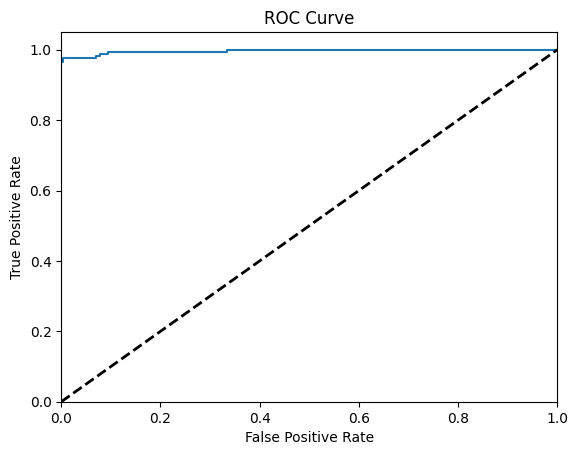

CONFUSION MATRIX
[[71  1]
 [ 3 40]]


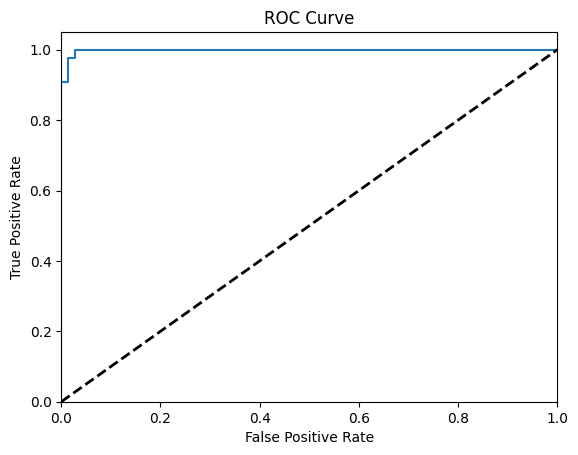

End Monte Carlo Simulation Iteration: 30
--------------------------------------------------------------------------------------------
Final Simulation Averages: 

Train Average Accuracy: 0.9845814977973573
Train Precision Accuracy: 0.9866063919259885
Train Recall Accuracy: 0.9804941347451469
Train F1 Score Accuracy: 0.9834025329677508
Train AUC Accuracy: 0.9965521298314824
Test Average Accuracy: 0.9652173913043472
Test Precision Accuracy: 0.9675346077785105
Test Recall Accuracy: 0.9581718346253225
Test F1 Score Accuracy: 0.9624918460534896
Test AUC Accuracy: 0.9981912144702846


In [9]:
def svm_lone_penalty(data):
    X_train, y_train, X_test, y_test = train_test_data_split(data)
    svm_l1 = make_pipeline(MinMaxScaler(), LinearSVC(max_iter = 10000, penalty = 'l1', dual = False))
    params = {}
    params["linearsvc__C"] = [1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3]
    grid_search = GridSearchCV(estimator = svm_l1, param_grid = params, cv = 5)
    grid_result = grid_search.fit(X_train, y_train)
    print("Best model is %s" % (grid_result.best_params_))
    return X_train, y_train, X_test, y_test, grid_result

train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_f1score_list = []
train_auc_list = []
test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f1score_list = []
test_auc_list = []

max_iter = 31
for i in range(1, max_iter):
    print("Start Monte Carlo Simulation Iteration: " + str(i))
    X_train, y_train, X_test, y_test, grid_result = svm_lone_penalty(data)
    best_estimator = grid_result.best_estimator_
    
    print("\nTRAIN DATA\n")
    train_predictions = grid_result.best_estimator_.predict(X_train)
    train_accuracy, train_precision, train_recall, train_f1, train_auc = print_and_get_metrics(best_estimator, train_predictions, X_train, y_train)
    train_accuracy_list.append(train_accuracy)
    train_precision_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_f1score_list.append(train_f1)
    train_auc_list.append(train_auc)
    
    print("\nTEST DATA\n")
    test_predictions = grid_result.best_estimator_.predict(X_test)
    test_accuracy, test_precision, test_recall, test_f1, test_auc = print_and_get_metrics(best_estimator, test_predictions, X_test, y_test)
    test_accuracy_list.append(test_accuracy)
    test_precision_list.append(test_precision)
    test_recall_list.append(test_recall)
    test_f1score_list.append(test_f1)
    test_auc_list.append(test_auc)
    
    if i == (max_iter - 1):
        roc_confmatrix_metrics(best_estimator, train_predictions, X_train, y_train)
        roc_confmatrix_metrics(best_estimator, test_predictions, X_test, y_test)
    print("End Monte Carlo Simulation Iteration: " + str(i))
    print("--------------------------------------------------------------------------------------------")
print("Final Simulation Averages: \n")
print("Train Average Accuracy: " + str(sum(train_accuracy_list)/len(train_accuracy_list)))
print("Train Precision Accuracy: " + str(sum(train_precision_list)/len(train_precision_list)))
print("Train Recall Accuracy: " + str(sum(train_recall_list)/len(train_recall_list)))
print("Train F1 Score Accuracy: " + str(sum(train_f1score_list)/len(train_f1score_list)))
print("Train AUC Accuracy: " + str(sum(train_auc_list)/len(train_auc_list)))

print("Test Average Accuracy: " + str(sum(test_accuracy_list)/len(test_accuracy_list)))
print("Test Precision Accuracy: " + str(sum(test_precision_list)/len(test_precision_list)))
print("Test Recall Accuracy: " + str(sum(test_recall_list)/len(test_recall_list)))
print("Test F1 Score Accuracy: " + str(sum(test_f1score_list)/len(test_f1score_list)))
print("Test AUC Accuracy: " + str(sum(test_auc_list)/len(test_auc_list)))

#### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

##### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

##### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [10]:
def labelled_unlabelled(X_train, y_train):
    unlabelled_b_count = math.ceil(0.5*0.2*357)
    unlabelled_m_count = math.ceil(0.5*0.2*212)
    X = pd.concat([X_train, y_train], axis=1, sort=False)

    b_data = X.loc[X["diagnosis"] == "B"]
    m_data = X.loc[X["diagnosis"] == "M"]

    b_unlabelled = b_data.apply(lambda x: x.sample(n=unlabelled_b_count, random_state=12))
    unlabelled_index_list = b_unlabelled.index.values.tolist()
    m_unlabelled = m_data.apply(lambda x: x.sample(n=unlabelled_m_count, random_state=12))
    unlabelled_index_list.extend(m_unlabelled.index.values.tolist())
    
    unlabelled_data_x = X_train.loc[unlabelled_index_list]
    labelled_data_y = y_train.drop(index=unlabelled_index_list)
    labelled_data_x = X_train.drop(index=unlabelled_index_list)
    
    labelled_data_x = labelled_data_x.reset_index(drop = True)
    unlabelled_data_x = unlabelled_data_x.reset_index(drop = True)
    labelled_data_y = labelled_data_y.reset_index(drop = True)
    return labelled_data_x, labelled_data_y, unlabelled_data_x

def find_farthest_datapoint(classifier, unlabelled_data_x):
    distance_to_decision_boundary = classifier.decision_function(unlabelled_data_x).tolist()
    index = distance_to_decision_boundary.index(max(distance_to_decision_boundary, key=abs))
    return index

Start Monte Carlo Simulation Iteration: 1
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best m

Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is 

Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is 

Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is 

Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is 

Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is 

Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is 

Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is 

Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is 

Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is {'linearsvc__C': 1}
Best model is 

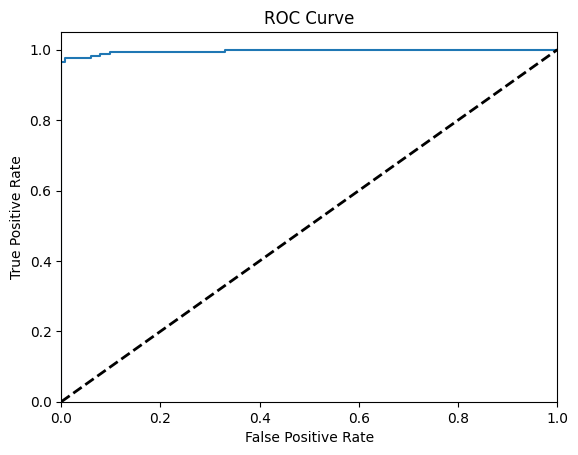

CONFUSION MATRIX
[[71  1]
 [ 2 41]]


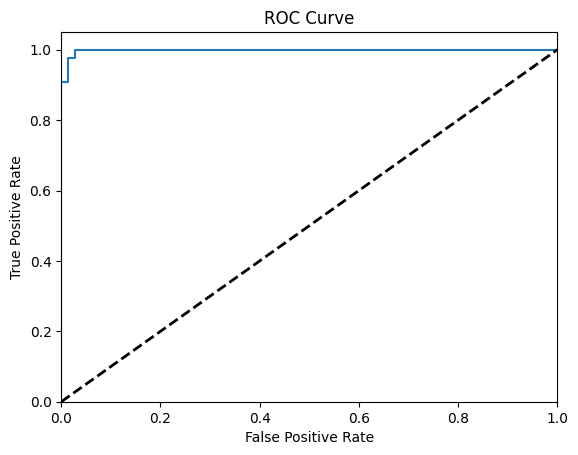

End Monte Carlo Simulation Iteration: 30
--------------------------------------------------------------------------------------------
Final Simulation Averages: 

Train Average Accuracy: 0.9845814977973573
Train Precision Accuracy: 0.9852953480589017
Train Recall Accuracy: 0.9816983286618919
Train F1 Score Accuracy: 0.9834440363626885
Train AUC Accuracy: 0.9965742759265022
Test Average Accuracy: 0.9739130434782614
Test Precision Accuracy: 0.9743966079582514
Test Recall Accuracy: 0.9697997416020671
Test F1 Score Accuracy: 0.9720081135902634
Test AUC Accuracy: 0.9983850129198969


In [11]:
def sssvm_lone_penalty(labelled_data_x, labelled_data_y):
    svm_l1 = make_pipeline(MinMaxScaler(), LinearSVC(max_iter = 10000, penalty = 'l1', dual = False))
    params = {}
    params["linearsvc__C"] = [1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3]
    grid_search = GridSearchCV(estimator = svm_l1, param_grid = params, cv = 5)
    grid_result = grid_search.fit(labelled_data_x, labelled_data_y)
    print("Best model is %s" % (grid_result.best_params_))
    return grid_result

train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_f1score_list = []
train_auc_list = []
test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f1score_list = []
test_auc_list = []

max_iter = 31
for i in range(1, max_iter):
    best_classifier = None
    print("Start Monte Carlo Simulation Iteration: " + str(i))
    X_train, y_train, X_test, y_test = train_test_data_split(data)
    labelled_data_x, labelled_data_y, unlabelled_data_x = labelled_unlabelled(X_train, y_train)
    while len(unlabelled_data_x) > 0:
        grid_result = sssvm_lone_penalty(labelled_data_x, labelled_data_y)
        best_estimator = grid_result.best_estimator_
        index = find_farthest_datapoint(best_estimator, unlabelled_data_x)
        datapoint = unlabelled_data_x.loc[index]
        pred = best_estimator.predict(datapoint.to_frame().T)
        labelled_data_x.loc[len(labelled_data_x)] = datapoint
        labelled_data_y.loc[len(labelled_data_y)] = pred
        unlabelled_data_x = unlabelled_data_x.drop(index = index)
        labelled_data_x = labelled_data_x.reset_index(drop = True)
        unlabelled_data_x = unlabelled_data_x.reset_index(drop = True)
        labelled_data_y = labelled_data_y.reset_index(drop = True)
        labelled_data_x = labelled_data_x.apply(pd.to_numeric)
        best_classifier = best_estimator
        
    print("\nTRAIN DATA\n")
    train_predictions = best_classifier.predict(X_train)
    train_accuracy, train_precision, train_recall, train_f1, train_auc = print_and_get_metrics(best_classifier, train_predictions, X_train, y_train)
    train_accuracy_list.append(train_accuracy)
    train_precision_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_f1score_list.append(train_f1)
    train_auc_list.append(train_auc)
    
    print("\nTEST DATA\n")
    test_predictions = best_classifier.predict(X_test)
    test_accuracy, test_precision, test_recall, test_f1, test_auc = print_and_get_metrics(best_classifier, test_predictions, X_test, y_test)
    test_accuracy_list.append(test_accuracy)
    test_precision_list.append(test_precision)
    test_recall_list.append(test_recall)
    test_f1score_list.append(test_f1)
    test_auc_list.append(test_auc)
    
    if i == (max_iter - 1):
        roc_confmatrix_metrics(best_classifier, train_predictions, X_train, y_train)
        roc_confmatrix_metrics(best_classifier, test_predictions, X_test, y_test)
    print("End Monte Carlo Simulation Iteration: " + str(i))
    print("--------------------------------------------------------------------------------------------")

print("Final Simulation Averages: \n")
print("Train Average Accuracy: " + str(sum(train_accuracy_list)/len(train_accuracy_list)))
print("Train Precision Accuracy: " + str(sum(train_precision_list)/len(train_precision_list)))
print("Train Recall Accuracy: " + str(sum(train_recall_list)/len(train_recall_list)))
print("Train F1 Score Accuracy: " + str(sum(train_f1score_list)/len(train_f1score_list)))
print("Train AUC Accuracy: " + str(sum(train_auc_list)/len(train_auc_list)))

print("Test Average Accuracy: " + str(sum(test_accuracy_list)/len(test_accuracy_list)))
print("Test Precision Accuracy: " + str(sum(test_precision_list)/len(test_precision_list)))
print("Test Recall Accuracy: " + str(sum(test_recall_list)/len(test_recall_list)))
print("Test F1 Score Accuracy: " + str(sum(test_f1score_list)/len(test_f1score_list)))
print("Test AUC Accuracy: " + str(sum(test_auc_list)/len(test_auc_list)))
        
    
        

#### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

##### A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

We can ensure the algorithm does not get trapped in local minimum by 
1. Run Kmeans algorithm multiple times (using n_init parameter) and take the best solution out of them 
2. Run Kmeans with different initilization - Random initialization or Kmeans++

##### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.1

In [9]:
def print_and_get_metrics_kmeans(predictions, x, y):
    auc_y = y.copy()
    auc_y["diagnosis"] = np.where(y["diagnosis"] == "B", 0, 1)
    auc_y_pred = predictions.copy()
    auc_y_pred["cluster_diagnosis"] = np.where(predictions["cluster_diagnosis"] == "B", 0, 1)
    auc_score = metrics.roc_auc_score(auc_y["diagnosis"], auc_y_pred["cluster_diagnosis"])
    print("AUC: " + str(auc_score))
    print("CLASSIFICATION REPORT")
    print(classification_report(y["diagnosis"], predictions["cluster_diagnosis"]))
    report = classification_report(y["diagnosis"], predictions["cluster_diagnosis"], output_dict = True)
    precision = report["macro avg"]["precision"]
    recall = report["macro avg"]["recall"]
    f1 = report["macro avg"]["f1-score"]
    accuracy = report["accuracy"]
    return accuracy, precision, recall, f1, auc_score

def roc_confmatrix_metrics_kmeans(kmeans_clf, predictions, x, y, positive_class):
    print("CONFUSION MATRIX")
    conf = metrics.confusion_matrix(y["diagnosis"].values.ravel(), predictions["cluster_diagnosis"])
    print(conf)
    cluster_centers = kmeans_clf.cluster_centers_
    distances = kmeans_clf.transform(x)
    distances = distances[:, positive_class]
    distances = distances.apply(lambda x: x*-1) 
    print(distances)
    scores = softmax(distances)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y, scores, pos_label="M")
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

Start Monte Carlo Simulation Iteration: 1

TRAIN DATA

AUC: 0.903778677462888
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.91      0.96      0.94       285
           M       0.93      0.85      0.89       169

    accuracy                           0.92       454
   macro avg       0.92      0.90      0.91       454
weighted avg       0.92      0.92      0.92       454


TEST DATA

AUC: 0.9279715762273901
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.93      0.97      0.95        72
           M       0.95      0.88      0.92        43

    accuracy                           0.94       115
   macro avg       0.94      0.93      0.93       115
weighted avg       0.94      0.94      0.94       115

End Monte Carlo Simulation Iteration: 1
--------------------------------------------------------------------------------------------
Start Monte Carlo Simulation Iteration: 2

TRAIN DATA




TRAIN DATA

AUC: 0.900820097581231
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.91      0.96      0.94       285
           M       0.93      0.84      0.88       169

    accuracy                           0.92       454
   macro avg       0.92      0.90      0.91       454
weighted avg       0.92      0.92      0.92       454


TEST DATA

AUC: 0.9279715762273901
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.93      0.97      0.95        72
           M       0.95      0.88      0.92        43

    accuracy                           0.94       115
   macro avg       0.94      0.93      0.93       115
weighted avg       0.94      0.94      0.94       115

End Monte Carlo Simulation Iteration: 10
--------------------------------------------------------------------------------------------
Start Monte Carlo Simulation Iteration: 11

TRAIN DATA

AUC: 0.900820097581231
CLASSIFICATION RE


TRAIN DATA

AUC: 0.9067372573445447
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.92      0.96      0.94       285
           M       0.93      0.85      0.89       169

    accuracy                           0.92       454
   macro avg       0.92      0.91      0.91       454
weighted avg       0.92      0.92      0.92       454


TEST DATA

AUC: 0.9279715762273901
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.93      0.97      0.95        72
           M       0.95      0.88      0.92        43

    accuracy                           0.94       115
   macro avg       0.94      0.93      0.93       115
weighted avg       0.94      0.94      0.94       115

End Monte Carlo Simulation Iteration: 20
--------------------------------------------------------------------------------------------
Start Monte Carlo Simulation Iteration: 21

TRAIN DATA

AUC: 0.9067372573445447
CLASSIFICATION 


TRAIN DATA

AUC: 0.9067372573445447
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.92      0.96      0.94       285
           M       0.93      0.85      0.89       169

    accuracy                           0.92       454
   macro avg       0.92      0.91      0.91       454
weighted avg       0.92      0.92      0.92       454


TEST DATA

AUC: 0.9279715762273901
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.93      0.97      0.95        72
           M       0.95      0.88      0.92        43

    accuracy                           0.94       115
   macro avg       0.94      0.93      0.93       115
weighted avg       0.94      0.94      0.94       115

CONFUSION MATRIX
[[274  11]
 [ 25 144]]


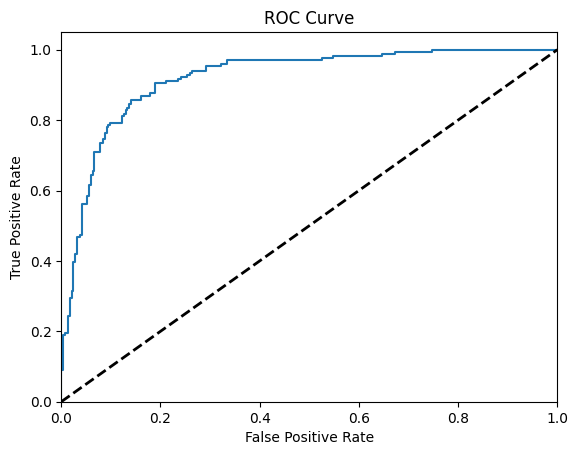

CONFUSION MATRIX
[[70  2]
 [ 5 38]]


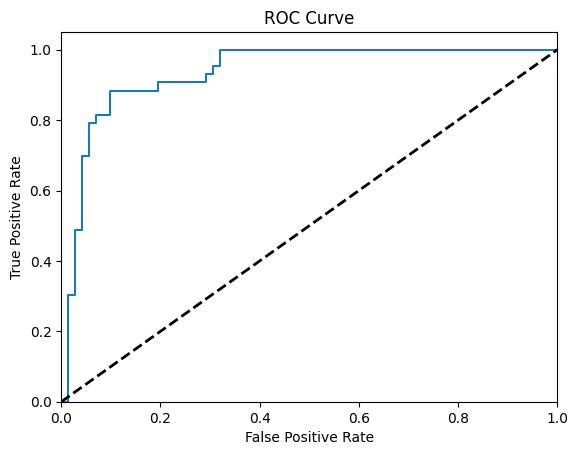

End Monte Carlo Simulation Iteration: 30
--------------------------------------------------------------------------------------------
Final Simulation Averages: 

Train Average Accuracy: 0.9188693098384728
Train Precision Accuracy: 0.921246049251556
Train Recall Accuracy: 0.9042717741098312
Train F1 Score Accuracy: 0.9115200653334565
Train AUC Accuracy: 0.9042717741098312
Test Average Accuracy: 0.9391304347826087
Test Precision Accuracy: 0.9416666666666665
Test Recall Accuracy: 0.9279715762273898
Test F1 Score Accuracy: 0.9340218014916813
Test AUC Accuracy: 0.9279715762273898


In [13]:
train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_f1score_list = []
train_auc_list = []
test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f1score_list = []
test_auc_list = []

minmaxscaler = MinMaxScaler()
standardscaler = StandardScaler()
max_iter = 31
for i in range(1, max_iter):
    print("Start Monte Carlo Simulation Iteration: " + str(i))
    X_train, y_train, X_test, y_test = train_test_data_split(data)
    X_train.reset_index(drop = True, inplace = True)
    y_train.reset_index(drop = True, inplace = True)
    X_test.reset_index(drop = True, inplace = True)
    y_test.reset_index(drop = True, inplace = True)
    
    minmaxscaler = minmaxscaler.fit(X_train)
    X_train = minmaxscaler.transform(X_train)
    X_test = minmaxscaler.transform(X_test)
    
    kmeans = KMeans(n_clusters=2, init = "random", n_init = 10).fit(X_train)
    cluster_centers = kmeans.cluster_centers_
    distances_zero = kmeans.transform(X_train)[:, 0]
    index_zero = np.argsort(distances_zero)[:30]
    distances_one = kmeans.transform(X_train)[:, 1]
    index_one = np.argsort(distances_one)[:30]
    class_zero = y_train.loc[index_zero]["diagnosis"].value_counts().idxmax()
    class_one = y_train.loc[index_one]["diagnosis"].value_counts().idxmax()
    if class_one == "M":
        positive_class = 1
    y_train_pred = y_train.copy()
    y_train_pred["label"] = pd.Series(kmeans.labels_)
    y_train_pred["cluster_diagnosis"] = np.where(y_train_pred["label"] == 0, class_zero, class_one)
    
    print("\nTRAIN DATA\n")
    train_accuracy, train_precision, train_recall, train_f1, train_auc = print_and_get_metrics_kmeans(
        y_train_pred, X_train, y_train)
    train_accuracy_list.append(train_accuracy)
    train_precision_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_f1score_list.append(train_f1)
    train_auc_list.append(train_auc)
    
    y_test_pred = y_test.copy()
    y_test_pred["label"] = pd.Series(kmeans.predict(X_test))
    y_test_pred["cluster_diagnosis"] = np.where(y_test_pred["label"] == 0, class_zero, class_one)
    
    print("\nTEST DATA\n")
    test_accuracy, test_precision, test_recall, test_f1, test_auc = print_and_get_metrics_kmeans(
        y_test_pred, X_test, y_test)
    test_accuracy_list.append(test_accuracy)
    test_precision_list.append(test_precision)
    test_recall_list.append(test_recall)
    test_f1score_list.append(test_f1)
    test_auc_list.append(test_auc)
    
    if i == (max_iter - 1):
        roc_confmatrix_metrics_kmeans(kmeans, y_train_pred, X_train, y_train, positive_class)
        roc_confmatrix_metrics_kmeans(kmeans, y_test_pred, X_test, y_test, positive_class)
    print("End Monte Carlo Simulation Iteration: " + str(i))
    print("--------------------------------------------------------------------------------------------")

print("Final Simulation Averages: \n")
print("Train Average Accuracy: " + str(sum(train_accuracy_list)/len(train_accuracy_list)))
print("Train Precision Accuracy: " + str(sum(train_precision_list)/len(train_precision_list)))
print("Train Recall Accuracy: " + str(sum(train_recall_list)/len(train_recall_list)))
print("Train F1 Score Accuracy: " + str(sum(train_f1score_list)/len(train_f1score_list)))
print("Train AUC Accuracy: " + str(sum(train_auc_list)/len(train_auc_list)))

print("Test Average Accuracy: " + str(sum(test_accuracy_list)/len(test_accuracy_list)))
print("Test Precision Accuracy: " + str(sum(test_precision_list)/len(test_precision_list)))
print("Test Recall Accuracy: " + str(sum(test_recall_list)/len(test_recall_list)))
print("Test F1 Score Accuracy: " + str(sum(test_f1score_list)/len(test_f1score_list)))
print("Test AUC Accuracy: " + str(sum(test_auc_list)/len(test_auc_list)))

#### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

In [14]:
def print_and_get_metrics_knn(classifier, predictions, x, y, positive_class):
    score = classifier.predict_proba(x)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y, score[:,positive_class], pos_label="M")
    auc_score = metrics.auc(false_positive_rate, true_positive_rate)
    print("AUC: " + str(auc_score))
    print("CLASSIFICATION REPORT")
    print(classification_report(y, predictions))
    report = classification_report(y, predictions, output_dict = True)
    precision = report["macro avg"]["precision"]
    recall = report["macro avg"]["recall"]
    f1 = report["macro avg"]["f1-score"]
    accuracy = report["accuracy"]
    return accuracy, precision, recall, f1, auc_score

def roc_confmatrix_metrics_knn(classifier, predictions, x, y, positive_class):
    print("CONFUSION MATRIX")
    conf = metrics.confusion_matrix(y.values.ravel(), predictions)
    print(conf)
    score = classifier.predict_proba(x)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y, score[:,positive_class], pos_label="M")
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

Start Monte Carlo Simulation Iteration: 1

TRAIN DATA

AUC: 0.8610401744004982
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.81      1.00      0.89       285
           M       0.99      0.60      0.75       169

    accuracy                           0.85       454
   macro avg       0.90      0.80      0.82       454
weighted avg       0.88      0.85      0.84       454


TEST DATA

AUC: 0.9040697674418606
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.84      1.00      0.91        72
           M       1.00      0.67      0.81        43

    accuracy                           0.88       115
   macro avg       0.92      0.84      0.86       115
weighted avg       0.90      0.88      0.87       115

End Monte Carlo Simulation Iteration: 1
--------------------------------------------------------------------------------------------
Start Monte Carlo Simulation Iteration: 2

TRAIN DATA



TRAIN DATA

AUC: 0.1389598255995017
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.81      1.00      0.89       285
           M       0.99      0.60      0.75       169

    accuracy                           0.85       454
   macro avg       0.90      0.80      0.82       454
weighted avg       0.88      0.85      0.84       454


TEST DATA

AUC: 0.09593023255813952
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.84      1.00      0.91        72
           M       1.00      0.67      0.81        43

    accuracy                           0.88       115
   macro avg       0.92      0.84      0.86       115
weighted avg       0.90      0.88      0.87       115

End Monte Carlo Simulation Iteration: 10
--------------------------------------------------------------------------------------------
Start Monte Carlo Simulation Iteration: 11

TRAIN DATA

AUC: 0.8610401744004982
CLASSIFICATION


TRAIN DATA

AUC: 0.8610401744004982
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.81      1.00      0.89       285
           M       0.99      0.60      0.75       169

    accuracy                           0.85       454
   macro avg       0.90      0.80      0.82       454
weighted avg       0.88      0.85      0.84       454


TEST DATA

AUC: 0.9040697674418606
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.84      1.00      0.91        72
           M       1.00      0.67      0.81        43

    accuracy                           0.88       115
   macro avg       0.92      0.84      0.86       115
weighted avg       0.90      0.88      0.87       115

End Monte Carlo Simulation Iteration: 19
--------------------------------------------------------------------------------------------
Start Monte Carlo Simulation Iteration: 20

TRAIN DATA

AUC: 0.8610401744004982
CLASSIFICATION 


TRAIN DATA

AUC: 0.8610401744004982
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.81      1.00      0.89       285
           M       0.99      0.60      0.75       169

    accuracy                           0.85       454
   macro avg       0.90      0.80      0.82       454
weighted avg       0.88      0.85      0.84       454


TEST DATA

AUC: 0.9040697674418606
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           B       0.84      1.00      0.91        72
           M       1.00      0.67      0.81        43

    accuracy                           0.88       115
   macro avg       0.92      0.84      0.86       115
weighted avg       0.90      0.88      0.87       115

End Monte Carlo Simulation Iteration: 28
--------------------------------------------------------------------------------------------
Start Monte Carlo Simulation Iteration: 29

TRAIN DATA

AUC: 0.1389598255995017
CLASSIFICATION 

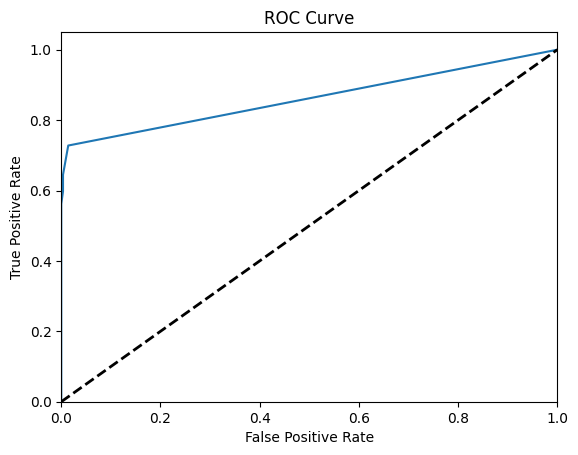

CONFUSION MATRIX
[[72  0]
 [14 29]]


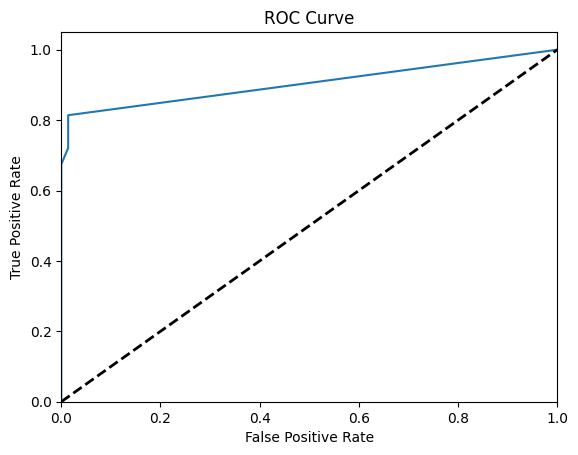

End Monte Carlo Simulation Iteration: 30
--------------------------------------------------------------------------------------------
Final Simulation Averages: 

Train Average Accuracy: 0.848017621145374
Train Precision Accuracy: 0.8985071301247771
Train Recall Accuracy: 0.7970621820824245
Train F1 Score Accuracy: 0.8185336013485729
Train AUC Accuracy: 0.7406934496003319
Test Average Accuracy: 0.8782608695652173
Test Precision Accuracy: 0.9186046511627912
Test Recall Accuracy: 0.8372093023255818
Test F1 Score Accuracy: 0.8584739803094231
Test AUC Accuracy: 0.7693798449612406


In [15]:
train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_f1score_list = []
train_auc_list = []
test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f1score_list = []
test_auc_list = []

minmaxscaler = MinMaxScaler()
standardscaler = StandardScaler()
max_iter = 31
for i in range(1, max_iter):
    print("Start Monte Carlo Simulation Iteration: " + str(i))
    X_train, y_train, X_test, y_test = train_test_data_split(data)
    X_train.reset_index(drop = True, inplace = True)
    y_train.reset_index(drop = True, inplace = True)
    X_test.reset_index(drop = True, inplace = True)
    y_test.reset_index(drop = True, inplace = True)
    
    minmaxscaler = minmaxscaler.fit(X_train)
    X_train = minmaxscaler.transform(X_train)
    X_test = minmaxscaler.transform(X_test)
    
#     standardscaler = standardscaler.fit(X_train)
#     X_train = standardscaler.transform(X_train)
#     X_test = standardscaler.transform(X_test)
    
    sclustering = SpectralClustering(n_clusters=2, assign_labels='kmeans', gamma = 1)
    y_pred = sclustering.fit_predict(X_train)
    index_zero = np.where(y_pred == 0)[0]
    index_one = np.where(y_pred == 1)[0]
    class_zero = y_train.loc[index_zero]["diagnosis"].value_counts().idxmax()
    class_one = y_train.loc[index_one]["diagnosis"].value_counts().idxmax()
    positive_class = 0
    if class_one == "M":
        positive_class = 1
    y_train_sc = y_train.copy()
    y_train_sc["label"] = pd.Series(y_pred)
    y_train_sc["cluster_diagnosis"] = np.where(y_train_sc["label"] == 0, class_zero, class_one)
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train_sc["cluster_diagnosis"])
    y_train_pred = y_train.copy()
    y_train_pred["cluster_diagnosis"] = pd.Series(knn.predict(X_train))
    
    print("\nTRAIN DATA\n")
    train_accuracy, train_precision, train_recall, train_f1, train_auc = print_and_get_metrics_knn(
        knn, y_train_pred["cluster_diagnosis"], X_train, y_train, positive_class)
    train_accuracy_list.append(train_accuracy)
    train_precision_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_f1score_list.append(train_f1)
    train_auc_list.append(train_auc)
    
    y_test_pred = y_test.copy()
    y_test_pred["cluster_diagnosis"] = pd.Series(knn.predict(X_test))
    
    print("\nTEST DATA\n")
    test_accuracy, test_precision, test_recall, test_f1, test_auc = print_and_get_metrics_knn(
        knn, y_test_pred["cluster_diagnosis"], X_test, y_test, positive_class)
    test_accuracy_list.append(test_accuracy)
    test_precision_list.append(test_precision)
    test_recall_list.append(test_recall)
    test_f1score_list.append(test_f1)
    test_auc_list.append(test_auc)
    
    if i == (max_iter - 1):
        roc_confmatrix_metrics_knn(knn, y_train_pred["cluster_diagnosis"], X_train, y_train, positive_class)
        roc_confmatrix_metrics_knn(knn, y_test_pred["cluster_diagnosis"], X_test, y_test, positive_class)
    print("End Monte Carlo Simulation Iteration: " + str(i))
    print("--------------------------------------------------------------------------------------------")

print("Final Simulation Averages: \n")
print("Train Average Accuracy: " + str(sum(train_accuracy_list)/len(train_accuracy_list)))
print("Train Precision Accuracy: " + str(sum(train_precision_list)/len(train_precision_list)))
print("Train Recall Accuracy: " + str(sum(train_recall_list)/len(train_recall_list)))
print("Train F1 Score Accuracy: " + str(sum(train_f1score_list)/len(train_f1score_list)))
print("Train AUC Accuracy: " + str(sum(train_auc_list)/len(train_auc_list)))

print("Test Average Accuracy: " + str(sum(test_accuracy_list)/len(test_accuracy_list)))
print("Test Precision Accuracy: " + str(sum(test_precision_list)/len(test_precision_list)))
print("Test Recall Accuracy: " + str(sum(test_recall_list)/len(test_recall_list)))
print("Test F1 Score Accuracy: " + str(sum(test_f1score_list)/len(test_f1score_list)))
print("Test AUC Accuracy: " + str(sum(test_auc_list)/len(test_auc_list)))

#### (v) One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

Supervised learning algorithm has performed the best. Then semi supervised learning. Unsupervised learning algorithm Kmeans has comparitively lesser scores compared to supervised and semi supervised learning with almost 9-10% difference in all scores. Spectral clustering with Knn has lower performance compared to all and is around 70% <br>

Supervised Learning with SVM   <br>
Final Simulation Averages:   <br>
Train Average Accuracy: 0.9845814977973573  <br>
Train Precision Accuracy: 0.9866063919259885  <br>
Train Recall Accuracy: 0.9804941347451469  <br>
Train F1 Score Accuracy: 0.9834025329677508  <br>
Train AUC Accuracy: 0.9965521298314824  <br>
Test Average Accuracy: 0.9652173913043472  <br>
Test Precision Accuracy: 0.9675346077785105  <br>
Test Recall Accuracy: 0.9581718346253225  <br>
Test F1 Score Accuracy: 0.9624918460534896  <br>
Test AUC Accuracy: 0.9981804478897505  <br>

Semi Supervised Learning with SVM   <br>
Final Simulation Averages:   <br>
Train Average Accuracy: 0.9845814977973573  <br>
Train Precision Accuracy: 0.9852953480589017  <br>
Train Recall Accuracy: 0.9816983286618919  <br>
Train F1 Score Accuracy: 0.9834440363626885  <br>
Train AUC Accuracy: 0.9965735838610328  <br>
Test Average Accuracy: 0.9739130434782614  <br>
Test Precision Accuracy: 0.9743966079582514  <br>
Test Recall Accuracy: 0.9697997416020671  <br>
Test F1 Score Accuracy: 0.9720081135902634  <br>
Test AUC Accuracy: 0.9983850129198969  <br>

Kmeans
Final Simulation Averages:  <br>
Train Average Accuracy: 0.9188693098384728  <br>
Train Precision Accuracy: 0.921246049251556  <br>
Train Recall Accuracy: 0.9042717741098312  <br>
Train F1 Score Accuracy: 0.9115200653334565  <br>
Train AUC Accuracy: 0.9042717741098312  <br>
Test Average Accuracy: 0.9391304347826087  <br>
Test Precision Accuracy: 0.9416666666666665  <br>
Test Recall Accuracy: 0.9279715762273898  <br>
Test F1 Score Accuracy: 0.9340218014916813  <br>
Test AUC Accuracy: 0.9279715762273898  <br>

Spectral Clustering <br>
Final Simulation Averages: <br>
Train Average Accuracy: 0.848017621145374  <br>
Train Precision Accuracy: 0.8985071301247771  <br>
Train Recall Accuracy: 0.7970621820824245  <br>
Train F1 Score Accuracy: 0.8185336013485729  <br>
Train AUC Accuracy: 0.7406934496003319  <br>
Test Average Accuracy: 0.8782608695652173  <br>
Test Precision Accuracy: 0.9186046511627912  <br>
Test Recall Accuracy: 0.8372093023255818  <br>
Test F1 Score Accuracy: 0.8584739803094231  <br>
Test AUC Accuracy: 0.7693798449612406  <br>

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [10]:
data = pd.read_csv("../Homework8Data/data_banknote_authentication.txt", header=None)
data

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [11]:
def train_test_split_learning(data):
    test = data.sample(n = 472, random_state = 42)
    train = data.drop(test.index)

    train.reset_index(drop = True, inplace = True)
    test.reset_index(drop = True, inplace = True)

    X_train = train[[0,1,2,3]]
    y_train = train[[4]]

    X_test = test[[0,1,2,3]]
    y_test = test[[4]]
    return X_train, y_train, X_test, y_test

X_train_true, y_train_true, X_test_true, y_test_true = train_test_split_learning(data)

### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

#### (i) Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [12]:
def svm_lone_penalty(x, y):
    svm_l1 = make_pipeline(MinMaxScaler(), LinearSVC(max_iter = 10000, penalty = 'l1', dual = False))
    params = {}
    params["linearsvc__C"] = [1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3]
    grid_search = GridSearchCV(estimator = svm_l1, param_grid = params, cv = 5)
    grid_result = grid_search.fit(x, y)
    return grid_result

passive_test_data = {}
max_iter = 51
for i in range(1, max_iter):
    print("Start Monte Carlo Simulation Iteration: " + str(i))
    X_train, y_train, X_test, y_test = X_train_true.copy(), y_train_true.copy(), X_test_true.copy(), y_test_true.copy()
    count = 0
    curr_test_data = []
    tillnow_train_x = None
    tillnow_train_y = None
    while len(X_train) > 0:
        count = count + 10
        curr_train_x = X_train.sample(n = 10)
        X_train = X_train.drop(curr_train_x.index)
        curr_train_y = y_train.loc[curr_train_x.index]
        y_train = y_train.drop(curr_train_y.index)
        
        if tillnow_train_x is None:
            tillnow_train_x = curr_train_x
            tillnow_train_y = curr_train_y
        else:
            tillnow_train_x = tillnow_train_x.append(curr_train_x)
            tillnow_train_y = tillnow_train_y.append(curr_train_y)
        grid_result = svm_lone_penalty(tillnow_train_x, tillnow_train_y)
        best_estimator = grid_result.best_estimator_
        test_accuracy = grid_result.best_estimator_.score(X_test, y_test)
        curr_test_data.append(1 - test_accuracy)
        print("Training set count: " + str(count) + " has best params: %s" % (grid_result.best_params_))
    
    print("\n")
    print("Test errors for 90 SVMs")
    data_to_print = [f'{(i+1)*10}, {v}' for i, v in enumerate(curr_test_data)]
    print("\n".join(data_to_print))
    passive_test_data[i] = curr_test_data
    print("End Monte Carlo Simulation Iteration: " + str(i))
    print("_____________________________________________________________________________________________")
    
        

Start Monte Carlo Simulation Iteration: 1
Training set count: 10 has best params: {'linearsvc__C': 1}
Training set count: 20 has best params: {'linearsvc__C': 10.0}
Training set count: 30 has best params: {'linearsvc__C': 100.0}
Training set count: 40 has best params: {'linearsvc__C': 1}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 1}
Training set count: 70 has best params: {'linearsvc__C': 100.0}
Training set count: 80 has best params: {'linearsvc__C': 100.0}
Training set count: 90 has best params: {'linearsvc__C': 100.0}
Training set count: 100 has best params: {'linearsvc__C': 100.0}
Training set count: 110 has best params: {'linearsvc__C': 100.0}
Training set count: 120 has best params: {'linearsvc__C': 100.0}
Training set count: 130 has best params: {'linearsvc__C': 1}
Training set count: 140 has best params: {'linearsvc__C': 1}
Training set count: 150 has best params: {'linearsvc__C': 1}
Training set count

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 100.0}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 10.0}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 10.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'li

Training set count: 40 has best params: {'linearsvc__C': 1}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 100.0}
Training set count: 70 has best params: {'linearsvc__C': 100.0}
Training set count: 80 has best params: {'linearsvc__C': 1000.0}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 10.0}
Training set count: 110 has best params: {'linearsvc__C': 100.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 100.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'

Training set count: 40 has best params: {'linearsvc__C': 1}
Training set count: 50 has best params: {'linearsvc__C': 1}
Training set count: 60 has best params: {'linearsvc__C': 1}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 1}
Training set count: 110 has best params: {'linearsvc__C': 1}
Training set count: 120 has best params: {'linearsvc__C': 1}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 1000.0}
Training set count: 150 has best params: {'linearsvc__C': 1000.0}
Training set count: 160 has best params: {'linearsvc__C': 1}
Training set count: 170 has best params: {'linearsvc__C': 1}
Training set count: 180 has best params: {'linearsvc__C': 1}
Training set count: 190 has best params: {'linearsvc__C': 1}
Training set c

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 1}
Training set count: 70 has best params: {'linearsvc__C': 100.0}
Training set count: 80 has best params: {'linearsvc__C': 100.0}
Training set count: 90 has best params: {'linearsvc__C': 100.0}
Training set count: 100 has best params: {'linearsvc__C': 1000.0}
Training set count: 110 has best params: {'linearsvc__C': 100.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 100.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 100.0}
Training set count: 170 has best params: {'linearsvc__C': 100.0}
Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best params

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 10.0}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 100.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 100.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'l

Training set count: 40 has best params: {'linearsvc__C': 100.0}
Training set count: 50 has best params: {'linearsvc__C': 1}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 1}
Training set count: 100 has best params: {'linearsvc__C': 10.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 100.0}
Training set count: 140 has best params: {'linearsvc__C': 100.0}
Training set count: 150 has best params: {'linearsvc__C': 100.0}
Training set count: 160 has best params: {'linearsvc__C': 100.0}
Training set count: 170 has best params: {'linearsvc__C': 100.0}
Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best params: {'linea

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 100.0}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 100.0}
Training set count: 100 has best params: {'linearsvc__C': 1}
Training set count: 110 has best params: {'linearsvc__C': 100.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 100.0}
Training set count: 150 has best params: {'linearsvc__C': 100.0}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'linears

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 1}
Training set count: 60 has best params: {'linearsvc__C': 1}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 100.0}
Training set count: 90 has best params: {'linearsvc__C': 100.0}
Training set count: 100 has best params: {'linearsvc__C': 1}
Training set count: 110 has best params: {'linearsvc__C': 100.0}
Training set count: 120 has best params: {'linearsvc__C': 1}
Training set count: 130 has best params: {'linearsvc__C': 1}
Training set count: 140 has best params: {'linearsvc__C': 100.0}
Training set count: 150 has best params: {'linearsvc__C': 100.0}
Training set count: 160 has best params: {'linearsvc__C': 1}
Training set count: 170 has best params: {'linearsvc__C': 1}
Training set count: 180 has best params: {'linearsvc__C': 1}
Training set count: 190 has best params: {'linearsvc__C': 1}
Trainin

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 10.0}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 10.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 100.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 100.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'l

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 1000.0}
Training set count: 100 has best params: {'linearsvc__C': 100.0}
Training set count: 110 has best params: {'linearsvc__C': 1}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'linear

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 1}
Training set count: 110 has best params: {'linearsvc__C': 1}
Training set count: 120 has best params: {'linearsvc__C': 1}
Training set count: 130 has best params: {'linearsvc__C': 1}
Training set count: 140 has best params: {'linearsvc__C': 1}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 1}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'linearsvc__C': 10.0}
Traini

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 10.0}
Training set count: 90 has best params: {'linearsvc__C': 1}
Training set count: 100 has best params: {'linearsvc__C': 1}
Training set count: 110 has best params: {'linearsvc__C': 1000.0}
Training set count: 120 has best params: {'linearsvc__C': 1}
Training set count: 130 has best params: {'linearsvc__C': 100.0}
Training set count: 140 has best params: {'linearsvc__C': 100.0}
Training set count: 150 has best params: {'linearsvc__C': 100.0}
Training set count: 160 has best params: {'linearsvc__C': 100.0}
Training set count: 170 has best params: {'linearsvc__C': 100.0}
Training set count: 180 has best params: {'linearsvc__C': 1}
Training set count: 190 has best params: {'linearsv

Training set count: 40 has best params: {'linearsvc__C': 1}
Training set count: 50 has best params: {'linearsvc__C': 1}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 10.0}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 1}
Training set count: 110 has best params: {'linearsvc__C': 100.0}
Training set count: 120 has best params: {'linearsvc__C': 100.0}
Training set count: 130 has best params: {'linearsvc__C': 1}
Training set count: 140 has best params: {'linearsvc__C': 1}
Training set count: 150 has best params: {'linearsvc__C': 100.0}
Training set count: 160 has best params: {'linearsvc__C': 100.0}
Training set count: 170 has best params: {'linearsvc__C': 1}
Training set count: 180 has best params: {'linearsvc__C': 1}
Training set count: 190 has best params: {'linearsvc__C': 100.0

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 100.0}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 1}
Training set count: 110 has best params: {'linearsvc__C': 100.0}
Training set count: 120 has best params: {'linearsvc__C': 100.0}
Training set count: 130 has best params: {'linearsvc__C': 1}
Training set count: 140 has best params: {'linearsvc__C': 1}
Training set count: 150 has best params: {'linearsvc__C': 1}
Training set count: 160 has best params: {'linearsvc__C': 1}
Training set count: 170 has best params: {'linearsvc__C': 1}
Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best params: {'linearsvc__C': 100.0}
T

Training set count: 40 has best params: {'linearsvc__C': 100.0}
Training set count: 50 has best params: {'linearsvc__C': 100.0}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 10.0}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 100.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 1}
Training set count: 150 has best params: {'linearsvc__C': 1}
Training set count: 160 has best params: {'linearsvc__C': 1}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'linearsvc

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 1}
Training set count: 100 has best params: {'linearsvc__C': 100.0}
Training set count: 110 has best params: {'linearsvc__C': 100.0}
Training set count: 120 has best params: {'linearsvc__C': 1}
Training set count: 130 has best params: {'linearsvc__C': 1}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 1}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 1}
Training set count: 180 has best params: {'linearsvc__C': 1}
Training set count: 190 has best params: {'linearsvc__C': 1}
Trai

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 100.0}
Training set count: 60 has best params: {'linearsvc__C': 1}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 100.0}
Training set count: 110 has best params: {'linearsvc__C': 100.0}
Training set count: 120 has best params: {'linearsvc__C': 1}
Training set count: 130 has best params: {'linearsvc__C': 1}
Training set count: 140 has best params: {'linearsvc__C': 1}
Training set count: 150 has best params: {'linearsvc__C': 1}
Training set count: 160 has best params: {'linearsvc__C': 1}
Training set count: 170 has best params: {'linearsvc__C': 1}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'linearsvc__C': 10.0}
Traini

Training set count: 40 has best params: {'linearsvc__C': 1}
Training set count: 50 has best params: {'linearsvc__C': 1}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 1}
Training set count: 100 has best params: {'linearsvc__C': 1}
Training set count: 110 has best params: {'linearsvc__C': 1}
Training set count: 120 has best params: {'linearsvc__C': 1}
Training set count: 130 has best params: {'linearsvc__C': 1}
Training set count: 140 has best params: {'linearsvc__C': 1}
Training set count: 150 has best params: {'linearsvc__C': 1}
Training set count: 160 has best params: {'linearsvc__C': 1}
Training set count: 170 has best params: {'linearsvc__C': 1}
Training set count: 180 has best params: {'linearsvc__C': 1}
Training set count: 190 has best params: {'linearsvc__C': 1}
Training set count: 200 

Training set count: 40 has best params: {'linearsvc__C': 1}
Training set count: 50 has best params: {'linearsvc__C': 100.0}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 1}
Training set count: 100 has best params: {'linearsvc__C': 100.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 1}
Training set count: 160 has best params: {'linearsvc__C': 1}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 1000.0}
Training set count: 190 has best params: {'linearsvc__C': 10

Training set count: 40 has best params: {'linearsvc__C': 100.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 100.0}
Training set count: 110 has best params: {'linearsvc__C': 100.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 1}
Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best params: {'linearsv

Training set count: 40 has best params: {'linearsvc__C': 1}
Training set count: 50 has best params: {'linearsvc__C': 1}
Training set count: 60 has best params: {'linearsvc__C': 1}
Training set count: 70 has best params: {'linearsvc__C': 1000.0}
Training set count: 80 has best params: {'linearsvc__C': 1000.0}
Training set count: 90 has best params: {'linearsvc__C': 1}
Training set count: 100 has best params: {'linearsvc__C': 1}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 1}
Training set count: 130 has best params: {'linearsvc__C': 1}
Training set count: 140 has best params: {'linearsvc__C': 1}
Training set count: 150 has best params: {'linearsvc__C': 100.0}
Training set count: 160 has best params: {'linearsvc__C': 100.0}
Training set count: 170 has best params: {'linearsvc__C': 100.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'linearsvc__C': 10.0}

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 1}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 1000.0}
Training set count: 100 has best params: {'linearsvc__C': 1000.0}
Training set count: 110 has best params: {'linearsvc__C': 1000.0}
Training set count: 120 has best params: {'linearsvc__C': 1}
Training set count: 130 has best params: {'linearsvc__C': 1}
Training set count: 140 has best params: {'linearsvc__C': 1}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 1000.0}
Training set count: 170 has best params: {'linearsvc__C': 1}
Training set count: 180 has best params: {'linearsvc__C': 1}
Training set count: 190 has best params: {'linearsvc__C': 100.

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 1}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 1000.0}
Training set count: 90 has best params: {'linearsvc__C': 100.0}
Training set count: 100 has best params: {'linearsvc__C': 100.0}
Training set count: 110 has best params: {'linearsvc__C': 100.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 100.0}
Training set count: 140 has best params: {'linearsvc__C': 100.0}
Training set count: 150 has best params: {'linearsvc__C': 100.0}
Training set count: 160 has best params: {'linearsvc__C': 100.0}
Training set count: 170 has best params: {'linearsvc__C': 100.0}
Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best param

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 100.0}
Training set count: 60 has best params: {'linearsvc__C': 100.0}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 1}
Training set count: 110 has best params: {'linearsvc__C': 1000.0}
Training set count: 120 has best params: {'linearsvc__C': 1000.0}
Training set count: 130 has best params: {'linearsvc__C': 1}
Training set count: 140 has best params: {'linearsvc__C': 100.0}
Training set count: 150 has best params: {'linearsvc__C': 100.0}
Training set count: 160 has best params: {'linearsvc__C': 100.0}
Training set count: 170 has best params: {'linearsvc__C': 1000.0}
Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best params: {'

Training set count: 40 has best params: {'linearsvc__C': 1}
Training set count: 50 has best params: {'linearsvc__C': 1}
Training set count: 60 has best params: {'linearsvc__C': 1}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 10.0}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 100.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 1}
Training set count: 130 has best params: {'linearsvc__C': 1}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 1}
Training set count: 170 has best params: {'linearsvc__C': 1}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'linearsvc__C': 10.0}
Train

Training set count: 40 has best params: {'linearsvc__C': 100.0}
Training set count: 50 has best params: {'linearsvc__C': 100.0}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 10.0}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 100.0}
Training set count: 110 has best params: {'linearsvc__C': 1}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 1}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'linear

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 100.0}
Training set count: 60 has best params: {'linearsvc__C': 100.0}
Training set count: 70 has best params: {'linearsvc__C': 100.0}
Training set count: 80 has best params: {'linearsvc__C': 100.0}
Training set count: 90 has best params: {'linearsvc__C': 100.0}
Training set count: 100 has best params: {'linearsvc__C': 100.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 1000.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 1}
Training set count: 150 has best params: {'linearsvc__C': 100.0}
Training set count: 160 has best params: {'linearsvc__C': 1}
Training set count: 170 has best params: {'linearsvc__C': 1}
Training set count: 180 has best params: {'linearsvc__C': 1}
Training set count: 190 has best params: {'linear

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 1}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 1}
Training set count: 100 has best params: {'linearsvc__C': 10.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'linearsvc__C': 

Training set count: 40 has best params: {'linearsvc__C': 100.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 1}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 100.0}
Training set count: 100 has best params: {'linearsvc__C': 1}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 1000.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'linearsvc__

Training set count: 40 has best params: {'linearsvc__C': 1}
Training set count: 50 has best params: {'linearsvc__C': 100.0}
Training set count: 60 has best params: {'linearsvc__C': 100.0}
Training set count: 70 has best params: {'linearsvc__C': 100.0}
Training set count: 80 has best params: {'linearsvc__C': 10.0}
Training set count: 90 has best params: {'linearsvc__C': 1}
Training set count: 100 has best params: {'linearsvc__C': 1}
Training set count: 110 has best params: {'linearsvc__C': 1}
Training set count: 120 has best params: {'linearsvc__C': 1}
Training set count: 130 has best params: {'linearsvc__C': 1}
Training set count: 140 has best params: {'linearsvc__C': 1}
Training set count: 150 has best params: {'linearsvc__C': 1}
Training set count: 160 has best params: {'linearsvc__C': 1}
Training set count: 170 has best params: {'linearsvc__C': 1}
Training set count: 180 has best params: {'linearsvc__C': 1}
Training set count: 190 has best params: {'linearsvc__C': 1}
Training set co

Training set count: 40 has best params: {'linearsvc__C': 1}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 100.0}
Training set count: 80 has best params: {'linearsvc__C': 100.0}
Training set count: 90 has best params: {'linearsvc__C': 100.0}
Training set count: 100 has best params: {'linearsvc__C': 10.0}
Training set count: 110 has best params: {'linearsvc__C': 100.0}
Training set count: 120 has best params: {'linearsvc__C': 1000.0}
Training set count: 130 has best params: {'linearsvc__C': 1000.0}
Training set count: 140 has best params: {'linearsvc__C': 1000.0}
Training set count: 150 has best params: {'linearsvc__C': 1000.0}
Training set count: 160 has best params: {'linearsvc__C': 1}
Training set count: 170 has best params: {'linearsvc__C': 1}
Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best params: {

Training set count: 40 has best params: {'linearsvc__C': 1}
Training set count: 50 has best params: {'linearsvc__C': 100.0}
Training set count: 60 has best params: {'linearsvc__C': 1}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 100.0}
Training set count: 110 has best params: {'linearsvc__C': 100.0}
Training set count: 120 has best params: {'linearsvc__C': 1}
Training set count: 130 has best params: {'linearsvc__C': 100.0}
Training set count: 140 has best params: {'linearsvc__C': 100.0}
Training set count: 150 has best params: {'linearsvc__C': 100.0}
Training set count: 160 has best params: {'linearsvc__C': 100.0}
Training set count: 170 has best params: {'linearsvc__C': 100.0}
Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best params: {'linearsvc

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 100.0}
Training set count: 60 has best params: {'linearsvc__C': 100.0}
Training set count: 70 has best params: {'linearsvc__C': 100.0}
Training set count: 80 has best params: {'linearsvc__C': 10.0}
Training set count: 90 has best params: {'linearsvc__C': 100.0}
Training set count: 100 has best params: {'linearsvc__C': 10.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 10.0}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 10.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 1000.0}
Training set count: 130 has best params: {'linearsvc__C': 1000.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {

Training set count: 40 has best params: {'linearsvc__C': 100.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 10.0}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 10.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 1}
Training set count: 180 has best params: {'linearsvc__C': 1}
Training set count: 190 has best params: {'linearsv

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 1}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 1}
Training set count: 100 has best params: {'linearsvc__C': 10.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 100.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'linearsvc__C':

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 100.0}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 10.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 1}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'linearsv

Training set count: 40 has best params: {'linearsvc__C': 1}
Training set count: 50 has best params: {'linearsvc__C': 1}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 10.0}
Training set count: 90 has best params: {'linearsvc__C': 1}
Training set count: 100 has best params: {'linearsvc__C': 1}
Training set count: 110 has best params: {'linearsvc__C': 1}
Training set count: 120 has best params: {'linearsvc__C': 1}
Training set count: 130 has best params: {'linearsvc__C': 1}
Training set count: 140 has best params: {'linearsvc__C': 1}
Training set count: 150 has best params: {'linearsvc__C': 1}
Training set count: 160 has best params: {'linearsvc__C': 1}
Training set count: 170 has best params: {'linearsvc__C': 1}
Training set count: 180 has best params: {'linearsvc__C': 1}
Training set count: 190 has best params: {'linearsvc__C': 100.0}
Training set count: 

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 1}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 1000.0}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 10.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'line

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 100.0}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 10.0}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 10.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 1}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'linea

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 1}
Training set count: 60 has best params: {'linearsvc__C': 1}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 10.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 1}
Training set count: 140 has best params: {'linearsvc__C': 100.0}
Training set count: 150 has best params: {'linearsvc__C': 1000.0}
Training set count: 160 has best params: {'linearsvc__C': 1000.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best params: {'linearsvc__C

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 1}
Training set count: 60 has best params: {'linearsvc__C': 1}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 1}
Training set count: 100 has best params: {'linearsvc__C': 10.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 100.0}
Training set count: 130 has best params: {'linearsvc__C': 100.0}
Training set count: 140 has best params: {'linearsvc__C': 100.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'linearsvc__C': 

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 1}
Training set count: 60 has best params: {'linearsvc__C': 100.0}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 100.0}
Training set count: 90 has best params: {'linearsvc__C': 1000.0}
Training set count: 100 has best params: {'linearsvc__C': 1}
Training set count: 110 has best params: {'linearsvc__C': 100.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 100.0}
Training set count: 170 has best params: {'linearsvc__C': 100.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'linea

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 10.0}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 100.0}
Training set count: 110 has best params: {'linearsvc__C': 100.0}
Training set count: 120 has best params: {'linearsvc__C': 100.0}
Training set count: 130 has best params: {'linearsvc__C': 100.0}
Training set count: 140 has best params: {'linearsvc__C': 100.0}
Training set count: 150 has best params: {'linearsvc__C': 100.0}
Training set count: 160 has best params: {'linearsvc__C': 100.0}
Training set count: 170 has best params: {'linearsvc__C': 100.0}
Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best para

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 10.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 1}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 1}
Training set count: 160 has best params: {'linearsvc__C': 1}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 1}
Training set count: 190 has best params: {'linearsvc__C': 10.0}


Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 1}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 10.0}
Training set count: 110 has best params: {'linearsvc__C': 100.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'linearsvc__

Training set count: 40 has best params: {'linearsvc__C': 1}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 1}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 1}
Training set count: 100 has best params: {'linearsvc__C': 1}
Training set count: 110 has best params: {'linearsvc__C': 1}
Training set count: 120 has best params: {'linearsvc__C': 1}
Training set count: 130 has best params: {'linearsvc__C': 1}
Training set count: 140 has best params: {'linearsvc__C': 1}
Training set count: 150 has best params: {'linearsvc__C': 1000.0}
Training set count: 160 has best params: {'linearsvc__C': 100.0}
Training set count: 170 has best params: {'linearsvc__C': 100.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'linearsvc__C': 100.0}
Trainin

Training set count: 40 has best params: {'linearsvc__C': 100.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 10.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 1}
Training set count: 150 has best params: {'linearsvc__C': 1}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'linearsvc__

Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 1}
Training set count: 70 has best params: {'linearsvc__C': 1}
Training set count: 80 has best params: {'linearsvc__C': 1}
Training set count: 90 has best params: {'linearsvc__C': 1}
Training set count: 100 has best params: {'linearsvc__C': 1}
Training set count: 110 has best params: {'linearsvc__C': 1}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 100.0}
Training set count: 170 has best params: {'linearsvc__C': 1}
Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best params: {'linearsvc__C': 100.0}


##### (ii) Train a SVM with a pool of 10 randomly selected data points from the training set5 using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [13]:
def svm_lone_penalty(x, y):
    svm_l1 = make_pipeline(MinMaxScaler(), LinearSVC(max_iter = 10000, penalty = 'l1', dual = False))
    params = {}
    params["linearsvc__C"] = [1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3]
    grid_search = GridSearchCV(estimator = svm_l1, param_grid = params, cv = 5)
    grid_result = grid_search.fit(x, y)
    return grid_result

def choose_close_ten(pipeline, x):
    model = pipeline.named_steps['linearsvc']
    W = model.coef_
    I = model.intercept_
    distance = abs(np.dot(x, W.transpose()) + I)
    distance = distance.flatten()
    indices = np.argsort(distance)[:10]
    indices = indices.reshape(indices.shape[0], -1)
    return indices.flatten()
    
    
active_test_data = {}
max_iter = 51
for i in range(1, max_iter):
    print("Start Monte Carlo Simulation Iteration: " + str(i))
    X_train, y_train, X_test, y_test = X_train_true.copy(), y_train_true.copy(), X_test_true.copy(), y_test_true.copy()
    X_train.reset_index(drop = True, inplace = True)
    y_train.reset_index(drop = True, inplace = True)
    X_test.reset_index(drop = True, inplace = True)
    y_test.reset_index(drop = True, inplace = True)
    count = 10
    curr_test_data = []
    trial_sample = y_train.sample(n = 10)
    while (len(pd.unique(trial_sample[4])) == 1):
        trial_sample = y_train.sample(n = 10)

    curr_train_x = X_train.iloc[trial_sample.index]
    X_train = X_train.drop(curr_train_x.index)
    curr_train_y = y_train.loc[curr_train_x.index]
    y_train = y_train.drop(curr_train_y.index)
    X_train.reset_index(drop = True, inplace = True)
    y_train.reset_index(drop = True, inplace = True)
    tillnow_train_x = curr_train_x
    tillnow_train_y = curr_train_y
    grid_result = svm_lone_penalty(tillnow_train_x, tillnow_train_y)
    best_estimator = grid_result.best_estimator_
    test_accuracy = grid_result.best_estimator_.score(X_test, y_test)
    curr_test_data.append(1 - test_accuracy)
    print("Training set count: " + str(count) + " has best params: %s" % (grid_result.best_params_))
    
    while len(X_train) > 0:
        count = count + 10
        indices = choose_close_ten(best_estimator, X_train)
        
        curr_train_x = X_train.loc[indices]
        X_train = X_train.drop(indices)
        curr_train_y = y_train.loc[indices]
        y_train = y_train.drop(indices)
        X_train.reset_index(drop = True, inplace = True)
        y_train.reset_index(drop = True, inplace = True)
        
        tillnow_train_x = tillnow_train_x.append(curr_train_x)
        tillnow_train_y = tillnow_train_y.append(curr_train_y)
        
        grid_result = svm_lone_penalty(tillnow_train_x, tillnow_train_y)
        best_estimator = grid_result.best_estimator_
        test_accuracy = grid_result.best_estimator_.score(X_test, y_test)
        curr_test_data.append(1 - test_accuracy)
        print("Training set count: " + str(count) + " has best params: %s" % (grid_result.best_params_))
    
    print("\n")
    print("Test errors for 90 SVMs")
    data_to_print = [f'{(i+1)*10}, {v}' for i, v in enumerate(curr_test_data)]
    print("\n".join(data_to_print))
    active_test_data[i] = curr_test_data
    print("End Monte Carlo Simulation Iteration: " + str(i))
    print("_____________________________________________________________________________________________")
        

Start Monte Carlo Simulation Iteration: 1
Training set count: 10 has best params: {'linearsvc__C': 0.001}
Training set count: 20 has best params: {'linearsvc__C': 1}
Training set count: 30 has best params: {'linearsvc__C': 1}
Training set count: 40 has best params: {'linearsvc__C': 10.0}
Training set count: 50 has best params: {'linearsvc__C': 10.0}
Training set count: 60 has best params: {'linearsvc__C': 10.0}
Training set count: 70 has best params: {'linearsvc__C': 10.0}
Training set count: 80 has best params: {'linearsvc__C': 10.0}
Training set count: 90 has best params: {'linearsvc__C': 100.0}
Training set count: 100 has best params: {'linearsvc__C': 1000.0}
Training set count: 110 has best params: {'linearsvc__C': 100.0}
Training set count: 120 has best params: {'linearsvc__C': 100.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 100.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Traini

Training set count: 30 has best params: {'linearsvc__C': 100.0}
Training set count: 40 has best params: {'linearsvc__C': 100.0}
Training set count: 50 has best params: {'linearsvc__C': 100.0}
Training set count: 60 has best params: {'linearsvc__C': 100.0}
Training set count: 70 has best params: {'linearsvc__C': 100.0}
Training set count: 80 has best params: {'linearsvc__C': 100.0}
Training set count: 90 has best params: {'linearsvc__C': 1000.0}
Training set count: 100 has best params: {'linearsvc__C': 10.0}
Training set count: 110 has best params: {'linearsvc__C': 100.0}
Training set count: 120 has best params: {'linearsvc__C': 100.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 100.0}
Training set count: 150 has best params: {'linearsvc__C': 100.0}
Training set count: 160 has best params: {'linearsvc__C': 100.0}
Training set count: 170 has best params: {'linearsvc__C': 100.0}
Training set count: 180 has best 

Training set count: 40 has best params: {'linearsvc__C': 100.0}
Training set count: 50 has best params: {'linearsvc__C': 100.0}
Training set count: 60 has best params: {'linearsvc__C': 100.0}
Training set count: 70 has best params: {'linearsvc__C': 100.0}
Training set count: 80 has best params: {'linearsvc__C': 100.0}
Training set count: 90 has best params: {'linearsvc__C': 1000.0}
Training set count: 100 has best params: {'linearsvc__C': 1000.0}
Training set count: 110 has best params: {'linearsvc__C': 1000.0}
Training set count: 120 has best params: {'linearsvc__C': 1000.0}
Training set count: 130 has best params: {'linearsvc__C': 100.0}
Training set count: 140 has best params: {'linearsvc__C': 100.0}
Training set count: 150 has best params: {'linearsvc__C': 100.0}
Training set count: 160 has best params: {'linearsvc__C': 1000.0}
Training set count: 170 has best params: {'linearsvc__C': 1000.0}
Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 h

Training set count: 60 has best params: {'linearsvc__C': 100.0}
Training set count: 70 has best params: {'linearsvc__C': 100.0}
Training set count: 80 has best params: {'linearsvc__C': 10.0}
Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 1}
Training set count: 110 has best params: {'linearsvc__C': 100.0}
Training set count: 120 has best params: {'linearsvc__C': 100.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 100.0}
Training set count: 160 has best params: {'linearsvc__C': 1000.0}
Training set count: 170 has best params: {'linearsvc__C': 100.0}
Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best params: {'linearsvc__C': 100.0}
Training set count: 200 has best params: {'linearsvc__C': 100.0}
Training set count: 210 has best par

Training set count: 70 has best params: {'linearsvc__C': 100.0}
Training set count: 80 has best params: {'linearsvc__C': 100.0}
Training set count: 90 has best params: {'linearsvc__C': 100.0}
Training set count: 100 has best params: {'linearsvc__C': 100.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 10.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 1000.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 100.0}
Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best params: {'linearsvc__C': 100.0}
Training set count: 200 has best params: {'linearsvc__C': 100.0}
Training set count: 210 has best params: {'linearsvc__C': 10.0}
Training set count: 220 has best 

Training set count: 90 has best params: {'linearsvc__C': 10.0}
Training set count: 100 has best params: {'linearsvc__C': 10.0}
Training set count: 110 has best params: {'linearsvc__C': 10.0}
Training set count: 120 has best params: {'linearsvc__C': 100.0}
Training set count: 130 has best params: {'linearsvc__C': 100.0}
Training set count: 140 has best params: {'linearsvc__C': 10.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best params: {'linearsvc__C': 100.0}
Training set count: 200 has best params: {'linearsvc__C': 100.0}
Training set count: 210 has best params: {'linearsvc__C': 10.0}
Training set count: 220 has best params: {'linearsvc__C': 10.0}
Training set count: 230 has best params: {'linearsvc__C': 10.0}
Training set count: 240 has best par

Training set count: 110 has best params: {'linearsvc__C': 100.0}
Training set count: 120 has best params: {'linearsvc__C': 100.0}
Training set count: 130 has best params: {'linearsvc__C': 10.0}
Training set count: 140 has best params: {'linearsvc__C': 100.0}
Training set count: 150 has best params: {'linearsvc__C': 10.0}
Training set count: 160 has best params: {'linearsvc__C': 10.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'linearsvc__C': 100.0}
Training set count: 200 has best params: {'linearsvc__C': 100.0}
Training set count: 210 has best params: {'linearsvc__C': 100.0}
Training set count: 220 has best params: {'linearsvc__C': 1000.0}
Training set count: 230 has best params: {'linearsvc__C': 1000.0}
Training set count: 240 has best params: {'linearsvc__C': 100.0}
Training set count: 250 has best params: {'linearsvc__C': 100.0}
Training set count: 260 has 

Training set count: 130 has best params: {'linearsvc__C': 100.0}
Training set count: 140 has best params: {'linearsvc__C': 100.0}
Training set count: 150 has best params: {'linearsvc__C': 100.0}
Training set count: 160 has best params: {'linearsvc__C': 100.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best params: {'linearsvc__C': 100.0}
Training set count: 200 has best params: {'linearsvc__C': 100.0}
Training set count: 210 has best params: {'linearsvc__C': 100.0}
Training set count: 220 has best params: {'linearsvc__C': 10.0}
Training set count: 230 has best params: {'linearsvc__C': 10.0}
Training set count: 240 has best params: {'linearsvc__C': 10.0}
Training set count: 250 has best params: {'linearsvc__C': 100.0}
Training set count: 260 has best params: {'linearsvc__C': 10.0}
Training set count: 270 has best params: {'linearsvc__C': 10.0}
Training set count: 280 has bes

Training set count: 150 has best params: {'linearsvc__C': 100.0}
Training set count: 160 has best params: {'linearsvc__C': 100.0}
Training set count: 170 has best params: {'linearsvc__C': 100.0}
Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best params: {'linearsvc__C': 10.0}
Training set count: 200 has best params: {'linearsvc__C': 1000.0}
Training set count: 210 has best params: {'linearsvc__C': 10.0}
Training set count: 220 has best params: {'linearsvc__C': 10.0}
Training set count: 230 has best params: {'linearsvc__C': 10.0}
Training set count: 240 has best params: {'linearsvc__C': 100.0}
Training set count: 250 has best params: {'linearsvc__C': 100.0}
Training set count: 260 has best params: {'linearsvc__C': 100.0}
Training set count: 270 has best params: {'linearsvc__C': 100.0}
Training set count: 280 has best params: {'linearsvc__C': 100.0}
Training set count: 290 has best params: {'linearsvc__C': 100.0}
Training set count: 300 has 

Training set count: 150 has best params: {'linearsvc__C': 100.0}
Training set count: 160 has best params: {'linearsvc__C': 100.0}
Training set count: 170 has best params: {'linearsvc__C': 10.0}
Training set count: 180 has best params: {'linearsvc__C': 10.0}
Training set count: 190 has best params: {'linearsvc__C': 100.0}
Training set count: 200 has best params: {'linearsvc__C': 100.0}
Training set count: 210 has best params: {'linearsvc__C': 100.0}
Training set count: 220 has best params: {'linearsvc__C': 1000.0}
Training set count: 230 has best params: {'linearsvc__C': 10.0}
Training set count: 240 has best params: {'linearsvc__C': 100.0}
Training set count: 250 has best params: {'linearsvc__C': 100.0}
Training set count: 260 has best params: {'linearsvc__C': 100.0}
Training set count: 270 has best params: {'linearsvc__C': 100.0}
Training set count: 280 has best params: {'linearsvc__C': 100.0}
Training set count: 290 has best params: {'linearsvc__C': 100.0}
Training set count: 300 has

Training set count: 150 has best params: {'linearsvc__C': 1000.0}
Training set count: 160 has best params: {'linearsvc__C': 100.0}
Training set count: 170 has best params: {'linearsvc__C': 1000.0}
Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best params: {'linearsvc__C': 100.0}
Training set count: 200 has best params: {'linearsvc__C': 100.0}
Training set count: 210 has best params: {'linearsvc__C': 100.0}
Training set count: 220 has best params: {'linearsvc__C': 10.0}
Training set count: 230 has best params: {'linearsvc__C': 10.0}
Training set count: 240 has best params: {'linearsvc__C': 10.0}
Training set count: 250 has best params: {'linearsvc__C': 10.0}
Training set count: 260 has best params: {'linearsvc__C': 10.0}
Training set count: 270 has best params: {'linearsvc__C': 100.0}
Training set count: 280 has best params: {'linearsvc__C': 10.0}
Training set count: 290 has best params: {'linearsvc__C': 10.0}
Training set count: 300 has be

Training set count: 160 has best params: {'linearsvc__C': 100.0}
Training set count: 170 has best params: {'linearsvc__C': 100.0}
Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best params: {'linearsvc__C': 100.0}
Training set count: 200 has best params: {'linearsvc__C': 100.0}
Training set count: 210 has best params: {'linearsvc__C': 100.0}
Training set count: 220 has best params: {'linearsvc__C': 10.0}
Training set count: 230 has best params: {'linearsvc__C': 10.0}
Training set count: 240 has best params: {'linearsvc__C': 10.0}
Training set count: 250 has best params: {'linearsvc__C': 10.0}
Training set count: 260 has best params: {'linearsvc__C': 10.0}
Training set count: 270 has best params: {'linearsvc__C': 10.0}
Training set count: 280 has best params: {'linearsvc__C': 10.0}
Training set count: 290 has best params: {'linearsvc__C': 100.0}
Training set count: 300 has best params: {'linearsvc__C': 100.0}
Training set count: 310 has best

Training set count: 170 has best params: {'linearsvc__C': 100.0}
Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best params: {'linearsvc__C': 10.0}
Training set count: 200 has best params: {'linearsvc__C': 100.0}
Training set count: 210 has best params: {'linearsvc__C': 100.0}
Training set count: 220 has best params: {'linearsvc__C': 100.0}
Training set count: 230 has best params: {'linearsvc__C': 100.0}
Training set count: 240 has best params: {'linearsvc__C': 100.0}
Training set count: 250 has best params: {'linearsvc__C': 10.0}
Training set count: 260 has best params: {'linearsvc__C': 10.0}
Training set count: 270 has best params: {'linearsvc__C': 100.0}
Training set count: 280 has best params: {'linearsvc__C': 100.0}
Training set count: 290 has best params: {'linearsvc__C': 100.0}
Training set count: 300 has best params: {'linearsvc__C': 100.0}
Training set count: 310 has best params: {'linearsvc__C': 1}
Training set count: 320 has best

Training set count: 190 has best params: {'linearsvc__C': 1000.0}
Training set count: 200 has best params: {'linearsvc__C': 100.0}
Training set count: 210 has best params: {'linearsvc__C': 100.0}
Training set count: 220 has best params: {'linearsvc__C': 100.0}
Training set count: 230 has best params: {'linearsvc__C': 100.0}
Training set count: 240 has best params: {'linearsvc__C': 100.0}
Training set count: 250 has best params: {'linearsvc__C': 100.0}
Training set count: 260 has best params: {'linearsvc__C': 10.0}
Training set count: 270 has best params: {'linearsvc__C': 100.0}
Training set count: 280 has best params: {'linearsvc__C': 100.0}
Training set count: 290 has best params: {'linearsvc__C': 10.0}
Training set count: 300 has best params: {'linearsvc__C': 10.0}
Training set count: 310 has best params: {'linearsvc__C': 10.0}
Training set count: 320 has best params: {'linearsvc__C': 10.0}
Training set count: 330 has best params: {'linearsvc__C': 10.0}
Training set count: 340 has be

Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best params: {'linearsvc__C': 10.0}
Training set count: 200 has best params: {'linearsvc__C': 10.0}
Training set count: 210 has best params: {'linearsvc__C': 10.0}
Training set count: 220 has best params: {'linearsvc__C': 10.0}
Training set count: 230 has best params: {'linearsvc__C': 100.0}
Training set count: 240 has best params: {'linearsvc__C': 100.0}
Training set count: 250 has best params: {'linearsvc__C': 10.0}
Training set count: 260 has best params: {'linearsvc__C': 100.0}
Training set count: 270 has best params: {'linearsvc__C': 10.0}
Training set count: 280 has best params: {'linearsvc__C': 10.0}
Training set count: 290 has best params: {'linearsvc__C': 10.0}
Training set count: 300 has best params: {'linearsvc__C': 100.0}
Training set count: 310 has best params: {'linearsvc__C': 1}
Training set count: 320 has best params: {'linearsvc__C': 100.0}
Training set count: 330 has best para

Training set count: 190 has best params: {'linearsvc__C': 100.0}
Training set count: 200 has best params: {'linearsvc__C': 10.0}
Training set count: 210 has best params: {'linearsvc__C': 10.0}
Training set count: 220 has best params: {'linearsvc__C': 10.0}
Training set count: 230 has best params: {'linearsvc__C': 10.0}
Training set count: 240 has best params: {'linearsvc__C': 10.0}
Training set count: 250 has best params: {'linearsvc__C': 10.0}
Training set count: 260 has best params: {'linearsvc__C': 10.0}
Training set count: 270 has best params: {'linearsvc__C': 100.0}
Training set count: 280 has best params: {'linearsvc__C': 10.0}
Training set count: 290 has best params: {'linearsvc__C': 10.0}
Training set count: 300 has best params: {'linearsvc__C': 10.0}
Training set count: 310 has best params: {'linearsvc__C': 10.0}
Training set count: 320 has best params: {'linearsvc__C': 10.0}
Training set count: 330 has best params: {'linearsvc__C': 10.0}
Training set count: 340 has best param

Training set count: 180 has best params: {'linearsvc__C': 100.0}
Training set count: 190 has best params: {'linearsvc__C': 10.0}
Training set count: 200 has best params: {'linearsvc__C': 1000.0}
Training set count: 210 has best params: {'linearsvc__C': 100.0}
Training set count: 220 has best params: {'linearsvc__C': 100.0}
Training set count: 230 has best params: {'linearsvc__C': 1000.0}
Training set count: 240 has best params: {'linearsvc__C': 100.0}
Training set count: 250 has best params: {'linearsvc__C': 10.0}
Training set count: 260 has best params: {'linearsvc__C': 100.0}
Training set count: 270 has best params: {'linearsvc__C': 1000.0}
Training set count: 280 has best params: {'linearsvc__C': 1}
Training set count: 290 has best params: {'linearsvc__C': 100.0}
Training set count: 300 has best params: {'linearsvc__C': 100.0}
Training set count: 310 has best params: {'linearsvc__C': 100.0}
Training set count: 320 has best params: {'linearsvc__C': 100.0}
Training set count: 330 has 

Training set count: 190 has best params: {'linearsvc__C': 100.0}
Training set count: 200 has best params: {'linearsvc__C': 100.0}
Training set count: 210 has best params: {'linearsvc__C': 10.0}
Training set count: 220 has best params: {'linearsvc__C': 10.0}
Training set count: 230 has best params: {'linearsvc__C': 10.0}
Training set count: 240 has best params: {'linearsvc__C': 10.0}
Training set count: 250 has best params: {'linearsvc__C': 10.0}
Training set count: 260 has best params: {'linearsvc__C': 10.0}
Training set count: 270 has best params: {'linearsvc__C': 10.0}
Training set count: 280 has best params: {'linearsvc__C': 10.0}
Training set count: 290 has best params: {'linearsvc__C': 100.0}
Training set count: 300 has best params: {'linearsvc__C': 10.0}
Training set count: 310 has best params: {'linearsvc__C': 10.0}
Training set count: 320 has best params: {'linearsvc__C': 10.0}
Training set count: 330 has best params: {'linearsvc__C': 100.0}
Training set count: 340 has best par

Training set count: 200 has best params: {'linearsvc__C': 100.0}
Training set count: 210 has best params: {'linearsvc__C': 100.0}
Training set count: 220 has best params: {'linearsvc__C': 100.0}
Training set count: 230 has best params: {'linearsvc__C': 100.0}
Training set count: 240 has best params: {'linearsvc__C': 10.0}
Training set count: 250 has best params: {'linearsvc__C': 10.0}
Training set count: 260 has best params: {'linearsvc__C': 100.0}
Training set count: 270 has best params: {'linearsvc__C': 100.0}
Training set count: 280 has best params: {'linearsvc__C': 100.0}
Training set count: 290 has best params: {'linearsvc__C': 10.0}
Training set count: 300 has best params: {'linearsvc__C': 10.0}
Training set count: 310 has best params: {'linearsvc__C': 10.0}
Training set count: 320 has best params: {'linearsvc__C': 100.0}
Training set count: 330 has best params: {'linearsvc__C': 10.0}
Training set count: 340 has best params: {'linearsvc__C': 1000.0}
Training set count: 350 has be

Training set count: 210 has best params: {'linearsvc__C': 100.0}
Training set count: 220 has best params: {'linearsvc__C': 100.0}
Training set count: 230 has best params: {'linearsvc__C': 10.0}
Training set count: 240 has best params: {'linearsvc__C': 10.0}
Training set count: 250 has best params: {'linearsvc__C': 100.0}
Training set count: 260 has best params: {'linearsvc__C': 10.0}
Training set count: 270 has best params: {'linearsvc__C': 100.0}
Training set count: 280 has best params: {'linearsvc__C': 100.0}
Training set count: 290 has best params: {'linearsvc__C': 10.0}
Training set count: 300 has best params: {'linearsvc__C': 10.0}
Training set count: 310 has best params: {'linearsvc__C': 100.0}
Training set count: 320 has best params: {'linearsvc__C': 10.0}
Training set count: 330 has best params: {'linearsvc__C': 1}
Training set count: 340 has best params: {'linearsvc__C': 100.0}
Training set count: 350 has best params: {'linearsvc__C': 100.0}
Training set count: 360 has best pa

Training set count: 220 has best params: {'linearsvc__C': 10.0}
Training set count: 230 has best params: {'linearsvc__C': 10.0}
Training set count: 240 has best params: {'linearsvc__C': 10.0}
Training set count: 250 has best params: {'linearsvc__C': 10.0}
Training set count: 260 has best params: {'linearsvc__C': 100.0}
Training set count: 270 has best params: {'linearsvc__C': 10.0}
Training set count: 280 has best params: {'linearsvc__C': 10.0}
Training set count: 290 has best params: {'linearsvc__C': 10.0}
Training set count: 300 has best params: {'linearsvc__C': 10.0}
Training set count: 310 has best params: {'linearsvc__C': 10.0}
Training set count: 320 has best params: {'linearsvc__C': 100.0}
Training set count: 330 has best params: {'linearsvc__C': 100.0}
Training set count: 340 has best params: {'linearsvc__C': 100.0}
Training set count: 350 has best params: {'linearsvc__C': 10.0}
Training set count: 360 has best params: {'linearsvc__C': 10.0}
Training set count: 370 has best par

Training set count: 230 has best params: {'linearsvc__C': 10.0}
Training set count: 240 has best params: {'linearsvc__C': 10.0}
Training set count: 250 has best params: {'linearsvc__C': 100.0}
Training set count: 260 has best params: {'linearsvc__C': 100.0}
Training set count: 270 has best params: {'linearsvc__C': 100.0}
Training set count: 280 has best params: {'linearsvc__C': 10.0}
Training set count: 290 has best params: {'linearsvc__C': 10.0}
Training set count: 300 has best params: {'linearsvc__C': 10.0}
Training set count: 310 has best params: {'linearsvc__C': 100.0}
Training set count: 320 has best params: {'linearsvc__C': 100.0}
Training set count: 330 has best params: {'linearsvc__C': 100.0}
Training set count: 340 has best params: {'linearsvc__C': 10.0}
Training set count: 350 has best params: {'linearsvc__C': 10.0}
Training set count: 360 has best params: {'linearsvc__C': 1000.0}
Training set count: 370 has best params: {'linearsvc__C': 1000.0}
Training set count: 380 has be

Training set count: 220 has best params: {'linearsvc__C': 100.0}
Training set count: 230 has best params: {'linearsvc__C': 100.0}
Training set count: 240 has best params: {'linearsvc__C': 100.0}
Training set count: 250 has best params: {'linearsvc__C': 100.0}
Training set count: 260 has best params: {'linearsvc__C': 100.0}
Training set count: 270 has best params: {'linearsvc__C': 100.0}
Training set count: 280 has best params: {'linearsvc__C': 10.0}
Training set count: 290 has best params: {'linearsvc__C': 100.0}
Training set count: 300 has best params: {'linearsvc__C': 10.0}
Training set count: 310 has best params: {'linearsvc__C': 10.0}
Training set count: 320 has best params: {'linearsvc__C': 10.0}
Training set count: 330 has best params: {'linearsvc__C': 100.0}
Training set count: 340 has best params: {'linearsvc__C': 10.0}
Training set count: 350 has best params: {'linearsvc__C': 10.0}
Training set count: 360 has best params: {'linearsvc__C': 100.0}
Training set count: 370 has bes

Training set count: 220 has best params: {'linearsvc__C': 10.0}
Training set count: 230 has best params: {'linearsvc__C': 10.0}
Training set count: 240 has best params: {'linearsvc__C': 10.0}
Training set count: 250 has best params: {'linearsvc__C': 10.0}
Training set count: 260 has best params: {'linearsvc__C': 10.0}
Training set count: 270 has best params: {'linearsvc__C': 10.0}
Training set count: 280 has best params: {'linearsvc__C': 10.0}
Training set count: 290 has best params: {'linearsvc__C': 100.0}
Training set count: 300 has best params: {'linearsvc__C': 1}
Training set count: 310 has best params: {'linearsvc__C': 1000.0}
Training set count: 320 has best params: {'linearsvc__C': 1}
Training set count: 330 has best params: {'linearsvc__C': 1}
Training set count: 340 has best params: {'linearsvc__C': 1}
Training set count: 350 has best params: {'linearsvc__C': 1}
Training set count: 360 has best params: {'linearsvc__C': 1}
Training set count: 370 has best params: {'linearsvc__C

Training set count: 230 has best params: {'linearsvc__C': 100.0}
Training set count: 240 has best params: {'linearsvc__C': 10.0}
Training set count: 250 has best params: {'linearsvc__C': 10.0}
Training set count: 260 has best params: {'linearsvc__C': 10.0}
Training set count: 270 has best params: {'linearsvc__C': 10.0}
Training set count: 280 has best params: {'linearsvc__C': 10.0}
Training set count: 290 has best params: {'linearsvc__C': 10.0}
Training set count: 300 has best params: {'linearsvc__C': 10.0}
Training set count: 310 has best params: {'linearsvc__C': 10.0}
Training set count: 320 has best params: {'linearsvc__C': 10.0}
Training set count: 330 has best params: {'linearsvc__C': 10.0}
Training set count: 340 has best params: {'linearsvc__C': 10.0}
Training set count: 350 has best params: {'linearsvc__C': 100.0}
Training set count: 360 has best params: {'linearsvc__C': 100.0}
Training set count: 370 has best params: {'linearsvc__C': 1}
Training set count: 380 has best params:

Training set count: 240 has best params: {'linearsvc__C': 10.0}
Training set count: 250 has best params: {'linearsvc__C': 10.0}
Training set count: 260 has best params: {'linearsvc__C': 100.0}
Training set count: 270 has best params: {'linearsvc__C': 100.0}
Training set count: 280 has best params: {'linearsvc__C': 100.0}
Training set count: 290 has best params: {'linearsvc__C': 10.0}
Training set count: 300 has best params: {'linearsvc__C': 10.0}
Training set count: 310 has best params: {'linearsvc__C': 1}
Training set count: 320 has best params: {'linearsvc__C': 1}
Training set count: 330 has best params: {'linearsvc__C': 1}
Training set count: 340 has best params: {'linearsvc__C': 1}
Training set count: 350 has best params: {'linearsvc__C': 1}
Training set count: 360 has best params: {'linearsvc__C': 1}
Training set count: 370 has best params: {'linearsvc__C': 1}
Training set count: 380 has best params: {'linearsvc__C': 1}
Training set count: 390 has best params: {'linearsvc__C': 1}


Training set count: 260 has best params: {'linearsvc__C': 10.0}
Training set count: 270 has best params: {'linearsvc__C': 100.0}
Training set count: 280 has best params: {'linearsvc__C': 10.0}
Training set count: 290 has best params: {'linearsvc__C': 100.0}
Training set count: 300 has best params: {'linearsvc__C': 10.0}
Training set count: 310 has best params: {'linearsvc__C': 10.0}
Training set count: 320 has best params: {'linearsvc__C': 10.0}
Training set count: 330 has best params: {'linearsvc__C': 10.0}
Training set count: 340 has best params: {'linearsvc__C': 10.0}
Training set count: 350 has best params: {'linearsvc__C': 1}
Training set count: 360 has best params: {'linearsvc__C': 1}
Training set count: 370 has best params: {'linearsvc__C': 1}
Training set count: 380 has best params: {'linearsvc__C': 1}
Training set count: 390 has best params: {'linearsvc__C': 1}
Training set count: 400 has best params: {'linearsvc__C': 1}
Training set count: 410 has best params: {'linearsvc__C'

Training set count: 250 has best params: {'linearsvc__C': 10.0}
Training set count: 260 has best params: {'linearsvc__C': 100.0}
Training set count: 270 has best params: {'linearsvc__C': 100.0}
Training set count: 280 has best params: {'linearsvc__C': 100.0}
Training set count: 290 has best params: {'linearsvc__C': 100.0}
Training set count: 300 has best params: {'linearsvc__C': 10.0}
Training set count: 310 has best params: {'linearsvc__C': 10.0}
Training set count: 320 has best params: {'linearsvc__C': 10.0}
Training set count: 330 has best params: {'linearsvc__C': 10.0}
Training set count: 340 has best params: {'linearsvc__C': 100.0}
Training set count: 350 has best params: {'linearsvc__C': 100.0}
Training set count: 360 has best params: {'linearsvc__C': 100.0}
Training set count: 370 has best params: {'linearsvc__C': 100.0}
Training set count: 380 has best params: {'linearsvc__C': 1000.0}
Training set count: 390 has best params: {'linearsvc__C': 100.0}
Training set count: 400 has b

Training set count: 260 has best params: {'linearsvc__C': 10.0}
Training set count: 270 has best params: {'linearsvc__C': 10.0}
Training set count: 280 has best params: {'linearsvc__C': 100.0}
Training set count: 290 has best params: {'linearsvc__C': 100.0}
Training set count: 300 has best params: {'linearsvc__C': 1000.0}
Training set count: 310 has best params: {'linearsvc__C': 10.0}
Training set count: 320 has best params: {'linearsvc__C': 1}
Training set count: 330 has best params: {'linearsvc__C': 10.0}
Training set count: 340 has best params: {'linearsvc__C': 10.0}
Training set count: 350 has best params: {'linearsvc__C': 10.0}
Training set count: 360 has best params: {'linearsvc__C': 10.0}
Training set count: 370 has best params: {'linearsvc__C': 10.0}
Training set count: 380 has best params: {'linearsvc__C': 10.0}
Training set count: 390 has best params: {'linearsvc__C': 10.0}
Training set count: 400 has best params: {'linearsvc__C': 10.0}
Training set count: 410 has best params

Training set count: 270 has best params: {'linearsvc__C': 10.0}
Training set count: 280 has best params: {'linearsvc__C': 10.0}
Training set count: 290 has best params: {'linearsvc__C': 10.0}
Training set count: 300 has best params: {'linearsvc__C': 1000.0}
Training set count: 310 has best params: {'linearsvc__C': 100.0}
Training set count: 320 has best params: {'linearsvc__C': 10.0}
Training set count: 330 has best params: {'linearsvc__C': 10.0}
Training set count: 340 has best params: {'linearsvc__C': 100.0}
Training set count: 350 has best params: {'linearsvc__C': 100.0}
Training set count: 360 has best params: {'linearsvc__C': 10.0}
Training set count: 370 has best params: {'linearsvc__C': 10.0}
Training set count: 380 has best params: {'linearsvc__C': 10.0}
Training set count: 390 has best params: {'linearsvc__C': 1000.0}
Training set count: 400 has best params: {'linearsvc__C': 10.0}
Training set count: 410 has best params: {'linearsvc__C': 10.0}
Training set count: 420 has best 

Training set count: 280 has best params: {'linearsvc__C': 1}
Training set count: 290 has best params: {'linearsvc__C': 10.0}
Training set count: 300 has best params: {'linearsvc__C': 1}
Training set count: 310 has best params: {'linearsvc__C': 10.0}
Training set count: 320 has best params: {'linearsvc__C': 100.0}
Training set count: 330 has best params: {'linearsvc__C': 10.0}
Training set count: 340 has best params: {'linearsvc__C': 10.0}
Training set count: 350 has best params: {'linearsvc__C': 100.0}
Training set count: 360 has best params: {'linearsvc__C': 100.0}
Training set count: 370 has best params: {'linearsvc__C': 100.0}
Training set count: 380 has best params: {'linearsvc__C': 10.0}
Training set count: 390 has best params: {'linearsvc__C': 1}
Training set count: 400 has best params: {'linearsvc__C': 100.0}
Training set count: 410 has best params: {'linearsvc__C': 100.0}
Training set count: 420 has best params: {'linearsvc__C': 100.0}
Training set count: 430 has best params: {

Training set count: 290 has best params: {'linearsvc__C': 10.0}
Training set count: 300 has best params: {'linearsvc__C': 10.0}
Training set count: 310 has best params: {'linearsvc__C': 10.0}
Training set count: 320 has best params: {'linearsvc__C': 10.0}
Training set count: 330 has best params: {'linearsvc__C': 10.0}
Training set count: 340 has best params: {'linearsvc__C': 10.0}
Training set count: 350 has best params: {'linearsvc__C': 10.0}
Training set count: 360 has best params: {'linearsvc__C': 10.0}
Training set count: 370 has best params: {'linearsvc__C': 10.0}
Training set count: 380 has best params: {'linearsvc__C': 1}
Training set count: 390 has best params: {'linearsvc__C': 1}
Training set count: 400 has best params: {'linearsvc__C': 1000.0}
Training set count: 410 has best params: {'linearsvc__C': 100.0}
Training set count: 420 has best params: {'linearsvc__C': 1}
Training set count: 430 has best params: {'linearsvc__C': 1}
Training set count: 440 has best params: {'linear

Training set count: 300 has best params: {'linearsvc__C': 10.0}
Training set count: 310 has best params: {'linearsvc__C': 10.0}
Training set count: 320 has best params: {'linearsvc__C': 10.0}
Training set count: 330 has best params: {'linearsvc__C': 10.0}
Training set count: 340 has best params: {'linearsvc__C': 10.0}
Training set count: 350 has best params: {'linearsvc__C': 1000.0}
Training set count: 360 has best params: {'linearsvc__C': 100.0}
Training set count: 370 has best params: {'linearsvc__C': 1000.0}
Training set count: 380 has best params: {'linearsvc__C': 1000.0}
Training set count: 390 has best params: {'linearsvc__C': 10.0}
Training set count: 400 has best params: {'linearsvc__C': 100.0}
Training set count: 410 has best params: {'linearsvc__C': 1000.0}
Training set count: 420 has best params: {'linearsvc__C': 100.0}
Training set count: 430 has best params: {'linearsvc__C': 10.0}
Training set count: 440 has best params: {'linearsvc__C': 10.0}
Training set count: 450 has b

Training set count: 300 has best params: {'linearsvc__C': 100.0}
Training set count: 310 has best params: {'linearsvc__C': 10.0}
Training set count: 320 has best params: {'linearsvc__C': 100.0}
Training set count: 330 has best params: {'linearsvc__C': 10.0}
Training set count: 340 has best params: {'linearsvc__C': 100.0}
Training set count: 350 has best params: {'linearsvc__C': 100.0}
Training set count: 360 has best params: {'linearsvc__C': 1000.0}
Training set count: 370 has best params: {'linearsvc__C': 100.0}
Training set count: 380 has best params: {'linearsvc__C': 1000.0}
Training set count: 390 has best params: {'linearsvc__C': 10.0}
Training set count: 400 has best params: {'linearsvc__C': 10.0}
Training set count: 410 has best params: {'linearsvc__C': 10.0}
Training set count: 420 has best params: {'linearsvc__C': 10.0}
Training set count: 430 has best params: {'linearsvc__C': 10.0}
Training set count: 440 has best params: {'linearsvc__C': 10.0}
Training set count: 450 has bes

Training set count: 310 has best params: {'linearsvc__C': 100.0}
Training set count: 320 has best params: {'linearsvc__C': 10.0}
Training set count: 330 has best params: {'linearsvc__C': 10.0}
Training set count: 340 has best params: {'linearsvc__C': 10.0}
Training set count: 350 has best params: {'linearsvc__C': 1}
Training set count: 360 has best params: {'linearsvc__C': 1}
Training set count: 370 has best params: {'linearsvc__C': 1}
Training set count: 380 has best params: {'linearsvc__C': 1}
Training set count: 390 has best params: {'linearsvc__C': 1}
Training set count: 400 has best params: {'linearsvc__C': 1}
Training set count: 410 has best params: {'linearsvc__C': 1}
Training set count: 420 has best params: {'linearsvc__C': 1}
Training set count: 430 has best params: {'linearsvc__C': 1}
Training set count: 440 has best params: {'linearsvc__C': 100.0}
Training set count: 450 has best params: {'linearsvc__C': 1}
Training set count: 460 has best params: {'linearsvc__C': 1}
Trainin

Training set count: 320 has best params: {'linearsvc__C': 10.0}
Training set count: 330 has best params: {'linearsvc__C': 10.0}
Training set count: 340 has best params: {'linearsvc__C': 100.0}
Training set count: 350 has best params: {'linearsvc__C': 100.0}
Training set count: 360 has best params: {'linearsvc__C': 100.0}
Training set count: 370 has best params: {'linearsvc__C': 100.0}
Training set count: 380 has best params: {'linearsvc__C': 10.0}
Training set count: 390 has best params: {'linearsvc__C': 10.0}
Training set count: 400 has best params: {'linearsvc__C': 10.0}
Training set count: 410 has best params: {'linearsvc__C': 10.0}
Training set count: 420 has best params: {'linearsvc__C': 100.0}
Training set count: 430 has best params: {'linearsvc__C': 10.0}
Training set count: 440 has best params: {'linearsvc__C': 10.0}
Training set count: 450 has best params: {'linearsvc__C': 100.0}
Training set count: 460 has best params: {'linearsvc__C': 100.0}
Training set count: 470 has best 

Training set count: 320 has best params: {'linearsvc__C': 100.0}
Training set count: 330 has best params: {'linearsvc__C': 1000.0}
Training set count: 340 has best params: {'linearsvc__C': 100.0}
Training set count: 350 has best params: {'linearsvc__C': 1000.0}
Training set count: 360 has best params: {'linearsvc__C': 100.0}
Training set count: 370 has best params: {'linearsvc__C': 1000.0}
Training set count: 380 has best params: {'linearsvc__C': 100.0}
Training set count: 390 has best params: {'linearsvc__C': 10.0}
Training set count: 400 has best params: {'linearsvc__C': 10.0}
Training set count: 410 has best params: {'linearsvc__C': 100.0}
Training set count: 420 has best params: {'linearsvc__C': 100.0}
Training set count: 430 has best params: {'linearsvc__C': 100.0}
Training set count: 440 has best params: {'linearsvc__C': 100.0}
Training set count: 450 has best params: {'linearsvc__C': 100.0}
Training set count: 460 has best params: {'linearsvc__C': 100.0}
Training set count: 470 

Training set count: 310 has best params: {'linearsvc__C': 100.0}
Training set count: 320 has best params: {'linearsvc__C': 10.0}
Training set count: 330 has best params: {'linearsvc__C': 10.0}
Training set count: 340 has best params: {'linearsvc__C': 100.0}
Training set count: 350 has best params: {'linearsvc__C': 100.0}
Training set count: 360 has best params: {'linearsvc__C': 100.0}
Training set count: 370 has best params: {'linearsvc__C': 100.0}
Training set count: 380 has best params: {'linearsvc__C': 10.0}
Training set count: 390 has best params: {'linearsvc__C': 100.0}
Training set count: 400 has best params: {'linearsvc__C': 10.0}
Training set count: 410 has best params: {'linearsvc__C': 10.0}
Training set count: 420 has best params: {'linearsvc__C': 10.0}
Training set count: 430 has best params: {'linearsvc__C': 10.0}
Training set count: 440 has best params: {'linearsvc__C': 10.0}
Training set count: 450 has best params: {'linearsvc__C': 100.0}
Training set count: 460 has best 

Training set count: 310 has best params: {'linearsvc__C': 100.0}
Training set count: 320 has best params: {'linearsvc__C': 100.0}
Training set count: 330 has best params: {'linearsvc__C': 100.0}
Training set count: 340 has best params: {'linearsvc__C': 100.0}
Training set count: 350 has best params: {'linearsvc__C': 1}
Training set count: 360 has best params: {'linearsvc__C': 10.0}
Training set count: 370 has best params: {'linearsvc__C': 1}
Training set count: 380 has best params: {'linearsvc__C': 10.0}
Training set count: 390 has best params: {'linearsvc__C': 1}
Training set count: 400 has best params: {'linearsvc__C': 1}
Training set count: 410 has best params: {'linearsvc__C': 1}
Training set count: 420 has best params: {'linearsvc__C': 1}
Training set count: 430 has best params: {'linearsvc__C': 1}
Training set count: 440 has best params: {'linearsvc__C': 100.0}
Training set count: 450 has best params: {'linearsvc__C': 100.0}
Training set count: 460 has best params: {'linearsvc__C

Training set count: 330 has best params: {'linearsvc__C': 1}
Training set count: 340 has best params: {'linearsvc__C': 1}
Training set count: 350 has best params: {'linearsvc__C': 1}
Training set count: 360 has best params: {'linearsvc__C': 1}
Training set count: 370 has best params: {'linearsvc__C': 10.0}
Training set count: 380 has best params: {'linearsvc__C': 1}
Training set count: 390 has best params: {'linearsvc__C': 1}
Training set count: 400 has best params: {'linearsvc__C': 1}
Training set count: 410 has best params: {'linearsvc__C': 10.0}
Training set count: 420 has best params: {'linearsvc__C': 10.0}
Training set count: 430 has best params: {'linearsvc__C': 1}
Training set count: 440 has best params: {'linearsvc__C': 1}
Training set count: 450 has best params: {'linearsvc__C': 1}
Training set count: 460 has best params: {'linearsvc__C': 1}
Training set count: 470 has best params: {'linearsvc__C': 1}
Training set count: 480 has best params: {'linearsvc__C': 1}
Training set co

Training set count: 350 has best params: {'linearsvc__C': 100.0}
Training set count: 360 has best params: {'linearsvc__C': 100.0}
Training set count: 370 has best params: {'linearsvc__C': 100.0}
Training set count: 380 has best params: {'linearsvc__C': 100.0}
Training set count: 390 has best params: {'linearsvc__C': 10.0}
Training set count: 400 has best params: {'linearsvc__C': 10.0}
Training set count: 410 has best params: {'linearsvc__C': 10.0}
Training set count: 420 has best params: {'linearsvc__C': 10.0}
Training set count: 430 has best params: {'linearsvc__C': 10.0}
Training set count: 440 has best params: {'linearsvc__C': 10.0}
Training set count: 450 has best params: {'linearsvc__C': 10.0}
Training set count: 460 has best params: {'linearsvc__C': 10.0}
Training set count: 470 has best params: {'linearsvc__C': 10.0}
Training set count: 480 has best params: {'linearsvc__C': 10.0}
Training set count: 490 has best params: {'linearsvc__C': 1}
Training set count: 500 has best params

Training set count: 360 has best params: {'linearsvc__C': 100.0}
Training set count: 370 has best params: {'linearsvc__C': 1000.0}
Training set count: 380 has best params: {'linearsvc__C': 1000.0}
Training set count: 390 has best params: {'linearsvc__C': 1000.0}
Training set count: 400 has best params: {'linearsvc__C': 1000.0}
Training set count: 410 has best params: {'linearsvc__C': 1000.0}
Training set count: 420 has best params: {'linearsvc__C': 1000.0}
Training set count: 430 has best params: {'linearsvc__C': 100.0}
Training set count: 440 has best params: {'linearsvc__C': 100.0}
Training set count: 450 has best params: {'linearsvc__C': 100.0}
Training set count: 460 has best params: {'linearsvc__C': 100.0}
Training set count: 470 has best params: {'linearsvc__C': 100.0}
Training set count: 480 has best params: {'linearsvc__C': 100.0}
Training set count: 490 has best params: {'linearsvc__C': 10.0}
Training set count: 500 has best params: {'linearsvc__C': 10.0}
Training set count: 5

Training set count: 360 has best params: {'linearsvc__C': 1}
Training set count: 370 has best params: {'linearsvc__C': 100.0}
Training set count: 380 has best params: {'linearsvc__C': 10.0}
Training set count: 390 has best params: {'linearsvc__C': 10.0}
Training set count: 400 has best params: {'linearsvc__C': 10.0}
Training set count: 410 has best params: {'linearsvc__C': 10.0}
Training set count: 420 has best params: {'linearsvc__C': 10.0}
Training set count: 430 has best params: {'linearsvc__C': 10.0}
Training set count: 440 has best params: {'linearsvc__C': 10.0}
Training set count: 450 has best params: {'linearsvc__C': 100.0}
Training set count: 460 has best params: {'linearsvc__C': 10.0}
Training set count: 470 has best params: {'linearsvc__C': 10.0}
Training set count: 480 has best params: {'linearsvc__C': 10.0}
Training set count: 490 has best params: {'linearsvc__C': 10.0}
Training set count: 500 has best params: {'linearsvc__C': 10.0}
Training set count: 510 has best params: 

Training set count: 360 has best params: {'linearsvc__C': 10.0}
Training set count: 370 has best params: {'linearsvc__C': 10.0}
Training set count: 380 has best params: {'linearsvc__C': 1000.0}
Training set count: 390 has best params: {'linearsvc__C': 10.0}
Training set count: 400 has best params: {'linearsvc__C': 10.0}
Training set count: 410 has best params: {'linearsvc__C': 10.0}
Training set count: 420 has best params: {'linearsvc__C': 10.0}
Training set count: 430 has best params: {'linearsvc__C': 10.0}
Training set count: 440 has best params: {'linearsvc__C': 100.0}
Training set count: 450 has best params: {'linearsvc__C': 1}
Training set count: 460 has best params: {'linearsvc__C': 1}
Training set count: 470 has best params: {'linearsvc__C': 1}
Training set count: 480 has best params: {'linearsvc__C': 1}
Training set count: 490 has best params: {'linearsvc__C': 1}
Training set count: 500 has best params: {'linearsvc__C': 1}
Training set count: 510 has best params: {'linearsvc__C

Training set count: 360 has best params: {'linearsvc__C': 100.0}
Training set count: 370 has best params: {'linearsvc__C': 1000.0}
Training set count: 380 has best params: {'linearsvc__C': 1000.0}
Training set count: 390 has best params: {'linearsvc__C': 10.0}
Training set count: 400 has best params: {'linearsvc__C': 10.0}
Training set count: 410 has best params: {'linearsvc__C': 100.0}
Training set count: 420 has best params: {'linearsvc__C': 10.0}
Training set count: 430 has best params: {'linearsvc__C': 1}
Training set count: 440 has best params: {'linearsvc__C': 1}
Training set count: 450 has best params: {'linearsvc__C': 1}
Training set count: 460 has best params: {'linearsvc__C': 1}
Training set count: 470 has best params: {'linearsvc__C': 10.0}
Training set count: 480 has best params: {'linearsvc__C': 1}
Training set count: 490 has best params: {'linearsvc__C': 1}
Training set count: 500 has best params: {'linearsvc__C': 10.0}
Training set count: 510 has best params: {'linearsvc

Training set count: 370 has best params: {'linearsvc__C': 100.0}
Training set count: 380 has best params: {'linearsvc__C': 10.0}
Training set count: 390 has best params: {'linearsvc__C': 10.0}
Training set count: 400 has best params: {'linearsvc__C': 10.0}
Training set count: 410 has best params: {'linearsvc__C': 10.0}
Training set count: 420 has best params: {'linearsvc__C': 10.0}
Training set count: 430 has best params: {'linearsvc__C': 10.0}
Training set count: 440 has best params: {'linearsvc__C': 10.0}
Training set count: 450 has best params: {'linearsvc__C': 10.0}
Training set count: 460 has best params: {'linearsvc__C': 10.0}
Training set count: 470 has best params: {'linearsvc__C': 100.0}
Training set count: 480 has best params: {'linearsvc__C': 100.0}
Training set count: 490 has best params: {'linearsvc__C': 100.0}
Training set count: 500 has best params: {'linearsvc__C': 10.0}
Training set count: 510 has best params: {'linearsvc__C': 10.0}
Training set count: 520 has best par

Training set count: 360 has best params: {'linearsvc__C': 1}
Training set count: 370 has best params: {'linearsvc__C': 1}
Training set count: 380 has best params: {'linearsvc__C': 100.0}
Training set count: 390 has best params: {'linearsvc__C': 100.0}
Training set count: 400 has best params: {'linearsvc__C': 100.0}
Training set count: 410 has best params: {'linearsvc__C': 1}
Training set count: 420 has best params: {'linearsvc__C': 1}
Training set count: 430 has best params: {'linearsvc__C': 100.0}
Training set count: 440 has best params: {'linearsvc__C': 100.0}
Training set count: 450 has best params: {'linearsvc__C': 1000.0}
Training set count: 460 has best params: {'linearsvc__C': 1000.0}
Training set count: 470 has best params: {'linearsvc__C': 10.0}
Training set count: 480 has best params: {'linearsvc__C': 10.0}
Training set count: 490 has best params: {'linearsvc__C': 10.0}
Training set count: 500 has best params: {'linearsvc__C': 10.0}
Training set count: 510 has best params: {'

Training set count: 360 has best params: {'linearsvc__C': 1}
Training set count: 370 has best params: {'linearsvc__C': 1}
Training set count: 380 has best params: {'linearsvc__C': 10.0}
Training set count: 390 has best params: {'linearsvc__C': 100.0}
Training set count: 400 has best params: {'linearsvc__C': 100.0}
Training set count: 410 has best params: {'linearsvc__C': 100.0}
Training set count: 420 has best params: {'linearsvc__C': 1000.0}
Training set count: 430 has best params: {'linearsvc__C': 1}
Training set count: 440 has best params: {'linearsvc__C': 1}
Training set count: 450 has best params: {'linearsvc__C': 1}
Training set count: 460 has best params: {'linearsvc__C': 1}
Training set count: 470 has best params: {'linearsvc__C': 100.0}
Training set count: 480 has best params: {'linearsvc__C': 100.0}
Training set count: 490 has best params: {'linearsvc__C': 1}
Training set count: 500 has best params: {'linearsvc__C': 1}
Training set count: 510 has best params: {'linearsvc__C':

Training set count: 370 has best params: {'linearsvc__C': 1}
Training set count: 380 has best params: {'linearsvc__C': 1}
Training set count: 390 has best params: {'linearsvc__C': 1}
Training set count: 400 has best params: {'linearsvc__C': 1}
Training set count: 410 has best params: {'linearsvc__C': 1}
Training set count: 420 has best params: {'linearsvc__C': 1}
Training set count: 430 has best params: {'linearsvc__C': 100.0}
Training set count: 440 has best params: {'linearsvc__C': 100.0}
Training set count: 450 has best params: {'linearsvc__C': 100.0}
Training set count: 460 has best params: {'linearsvc__C': 10.0}
Training set count: 470 has best params: {'linearsvc__C': 1}
Training set count: 480 has best params: {'linearsvc__C': 1}
Training set count: 490 has best params: {'linearsvc__C': 1}
Training set count: 500 has best params: {'linearsvc__C': 1000.0}
Training set count: 510 has best params: {'linearsvc__C': 1}
Training set count: 520 has best params: {'linearsvc__C': 1}
Trai

Training set count: 380 has best params: {'linearsvc__C': 100.0}
Training set count: 390 has best params: {'linearsvc__C': 1}
Training set count: 400 has best params: {'linearsvc__C': 10.0}
Training set count: 410 has best params: {'linearsvc__C': 10.0}
Training set count: 420 has best params: {'linearsvc__C': 1}
Training set count: 430 has best params: {'linearsvc__C': 10.0}
Training set count: 440 has best params: {'linearsvc__C': 1}
Training set count: 450 has best params: {'linearsvc__C': 10.0}
Training set count: 460 has best params: {'linearsvc__C': 10.0}
Training set count: 470 has best params: {'linearsvc__C': 10.0}
Training set count: 480 has best params: {'linearsvc__C': 1}
Training set count: 490 has best params: {'linearsvc__C': 1}
Training set count: 500 has best params: {'linearsvc__C': 10.0}
Training set count: 510 has best params: {'linearsvc__C': 1}
Training set count: 520 has best params: {'linearsvc__C': 1}
Training set count: 530 has best params: {'linearsvc__C': 1}

#### (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

Average of 90 SVMs across 50 simulations for Passive learning: 
[0.173771186440678, 0.07258474576271187, 0.05148305084745765, 0.03423728813559321, 0.026864406779661006, 0.025805084745762697, 0.023093220338983044, 0.02182203389830507, 0.018093220338983033, 0.017499999999999977, 0.0167372881355932, 0.016271186440677942, 0.016864406779660997, 0.015550847457627096, 0.014576271186440655, 0.015169491525423701, 0.01474576271186438, 0.01322033898305082, 0.013771186440677936, 0.012796610169491497, 0.012966101694915223, 0.012838983050847429, 0.01249999999999997, 0.012203389830508444, 0.01249999999999997, 0.011991525423728784, 0.01190677966101692, 0.011991525423728782, 0.011864406779660986, 0.011186440677966071, 0.0113559322033898, 0.01114406779661014, 0.01114406779661014, 0.011440677966101664, 0.011101694915254208, 0.011610169491525393, 0.0113559322033898, 0.01114406779661014, 0.011228813559322004, 0.011652542372881325, 0.011313559322033867, 0.01156779661016946, 0.0113559322033898, 0.01131355932

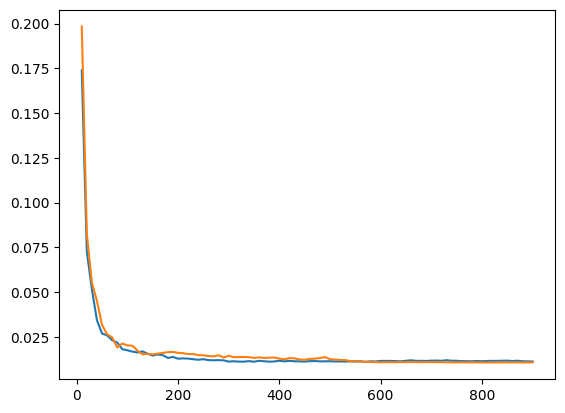

In [17]:
simulation_data = []
for (k,v) in passive_test_data.items():
    simulation_data.append(v)
    
averages = [sum(i) for i in zip(*simulation_data)]
y_axis = [x / 50 for x in averages]
print("Average of 90 SVMs across 50 simulations for Passive learning: ")
print(y_axis)
print("\n")
x_axis = np.arange(10, 900+1, 10)

simulation_data_active = []
for (k,v) in active_test_data.items():
    simulation_data_active.append(v)
    
averages_active = [sum(i) for i in zip(*simulation_data_active)]
y_axis_active = [x / 50 for x in averages_active]
print("Average of 90 SVMs across 50 simulations: ")
print(y_axis_active)
x_axis_active = np.arange(10, 900+1, 10)

plt.plot(x_axis, y_axis, label='passive')

plt.plot(x_axis_active, y_axis_active, label='active')
plt.legend
plt.show()

###### Plot Legend <br>
Blue - Passive learning <br>
Orange - Active learning <br>


#### Conclusions
We can see from the graphs that passive and active learning have performed equally well. Passive learning has a bit lower test error when compared to active learning. Active learning started at approx .20 test error whereas passive started at around 0.17. 